## Data-Driven Solutions for a Safer Toronto
#### Empowering NPO Services to Respond to Shooting Victims

Authors: Darren Singh, Runze Xu  & Sushmit Richard 

Please note that this notebook is intended to have each cell ran after the other sequentially. And each cell assumes that the cells after it have not been run and the cells before it have been run.

Data Source: https://data.torontopolice.on.ca/datasets/TorontoPS::shooting-and-firearm-discharges-open-data/about

**Purpose**:
This comprehensive dataset captures all shooting-related occurrences reported to the Toronto Police Service from 2004 to 2022. Non-profit organizations focused on violence prevention and response can utilize this data to analyze patterns and emerging trends in gun violence incidents. By pinpointing high-risk areas, demographics, and potential causes of violence, these organizations can develop evidence-based strategies and programs, precisely targeting prevention efforts and response operations. Sharing this crucial information with the community raises awareness and fosters collaborative efforts among policymakers, community leaders, and stakeholders to collectively address the pressing issue of gun violence in Toronto.


**Scope**:
Using the given dataset, we will:
- Identify the neighbourhoods with the highest rates of shootings.
- Identify the times of day at which these shootings most often occur in these neighbourhoods. 
- Draft recommendations for the NPO, Victim Services Toronto. It has programs like Victim Crisis Response Program which responds immediately to support individuals and families in the aftermath of crime and/or sudden tragedy (Victim Services Toronto, n.d.). The NPO could use this information to determine the location of future branches and adjust the hours of operation and allocation of resources. This would allow it to apply their programs more effectively to dispense aid to victims of shootings as they would be able to predict where and when shootings are likely to happen. 

**Key Business Questions:**
1. What is the relative risk of shootings in different neighborhoods?
2. What is the relative need for Victim Services in each neighborhood based on number of shootings in each neighborhood?
3. How accurate are the predictive models in identifying shooting incident hour ranges in high-risk neighborhoods?



In [123]:
import pandas as pd 
import numpy as np
import warnings
from matplotlib import pyplot as plt
import seaborn as sns

In [124]:
data = pd.read_csv('https://raw.githubusercontent.com/offcial17/schulich_data_science/main/Datasets/Shooting_and_Firearm_Discharges_Open_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

# Data Cleaning Notes

* Although it shows that no columns have no non-null entries, there are in fact entries present within the data that are null   

* The neighbourhood columns contain NSA, which is a null entry of sorts, indicating the neighbourhood of the shooting is not known   

* The latitude column contains 0 occasionally, this must be cases in which the latitude is unknown as a latitude of 0 is the equator

# Preliminary Steps

* Will set the unique identifier to be the index   

* Will check for duplicates   

* Will plot histograms of each variable

In [125]:
# set index to the unique ID of each event
data.set_index('OBJECTID', inplace=True)

In [126]:
# check for duplicates

data = data.drop_duplicates()
data.info()

# No duplicates were found, same amount of data before and after removing duplicates

is_duplicate = data['EVENT_UNIQUE_ID'].duplicated()

duplicates = data[is_duplicate]

print(duplicates)
# empty dataframe, indicating there are no duplicates

<class 'pandas.core.frame.DataFrame'>
Index: 5707 entries, 1 to 5707
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   EVENT_UNIQUE_ID    5707 non-null   object 
 3   OCC_DATE           5707 non-null   object 
 4   OCC_YEAR           5707 non-null   int64  
 5   OCC_MONTH          5707 non-null   object 
 6   OCC_DOW            5707 non-null   object 
 7   OCC_DOY            5707 non-null   int64  
 8   OCC_DAY            5707 non-null   int64  
 9   OCC_HOUR           5707 non-null   int64  
 10  OCC_TIME_RANGE     5707 non-null   object 
 11  DIVISION           5707 non-null   object 
 12  DEATH              5707 non-null   int64  
 13  INJURIES           5707 non-null   int64  
 14  HOOD_158           5707 non-null   object 
 15  NEIGHBOURHOOD_158  5707 non-null   object 
 16  HOOD_140           5707 non-n

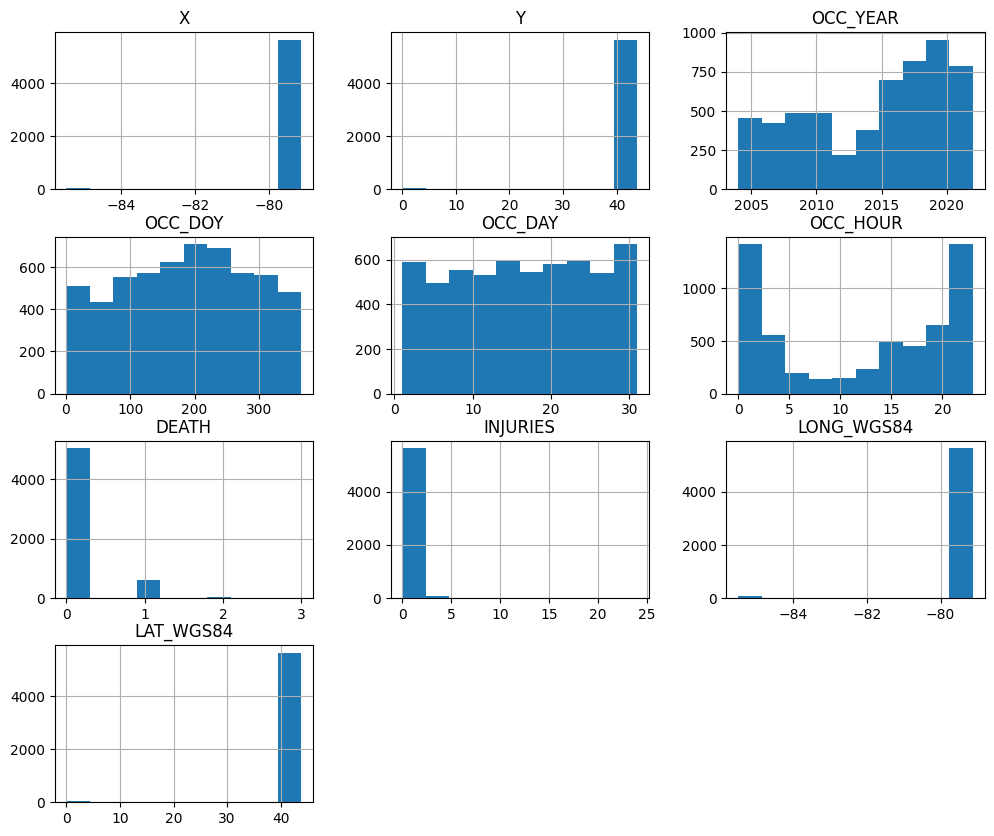

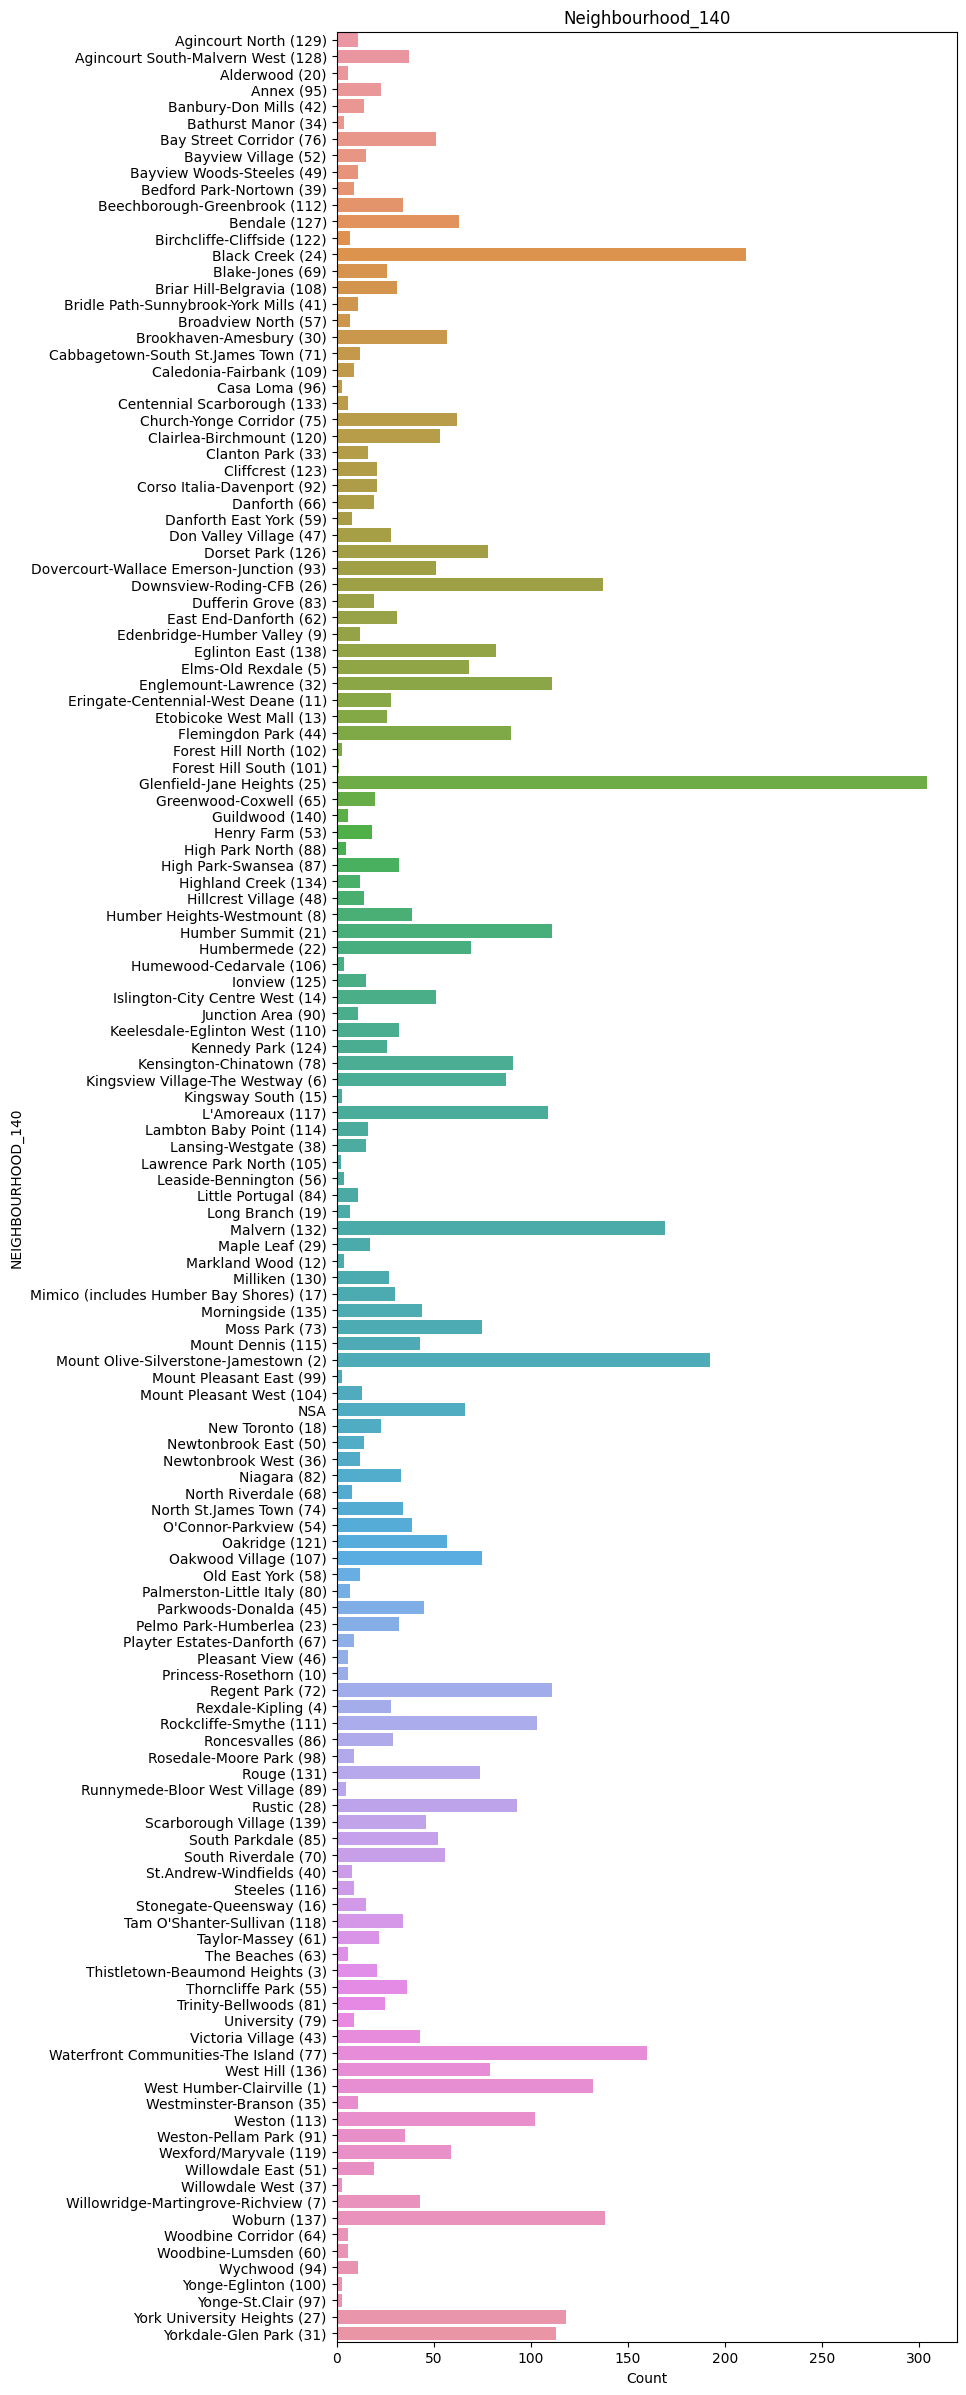

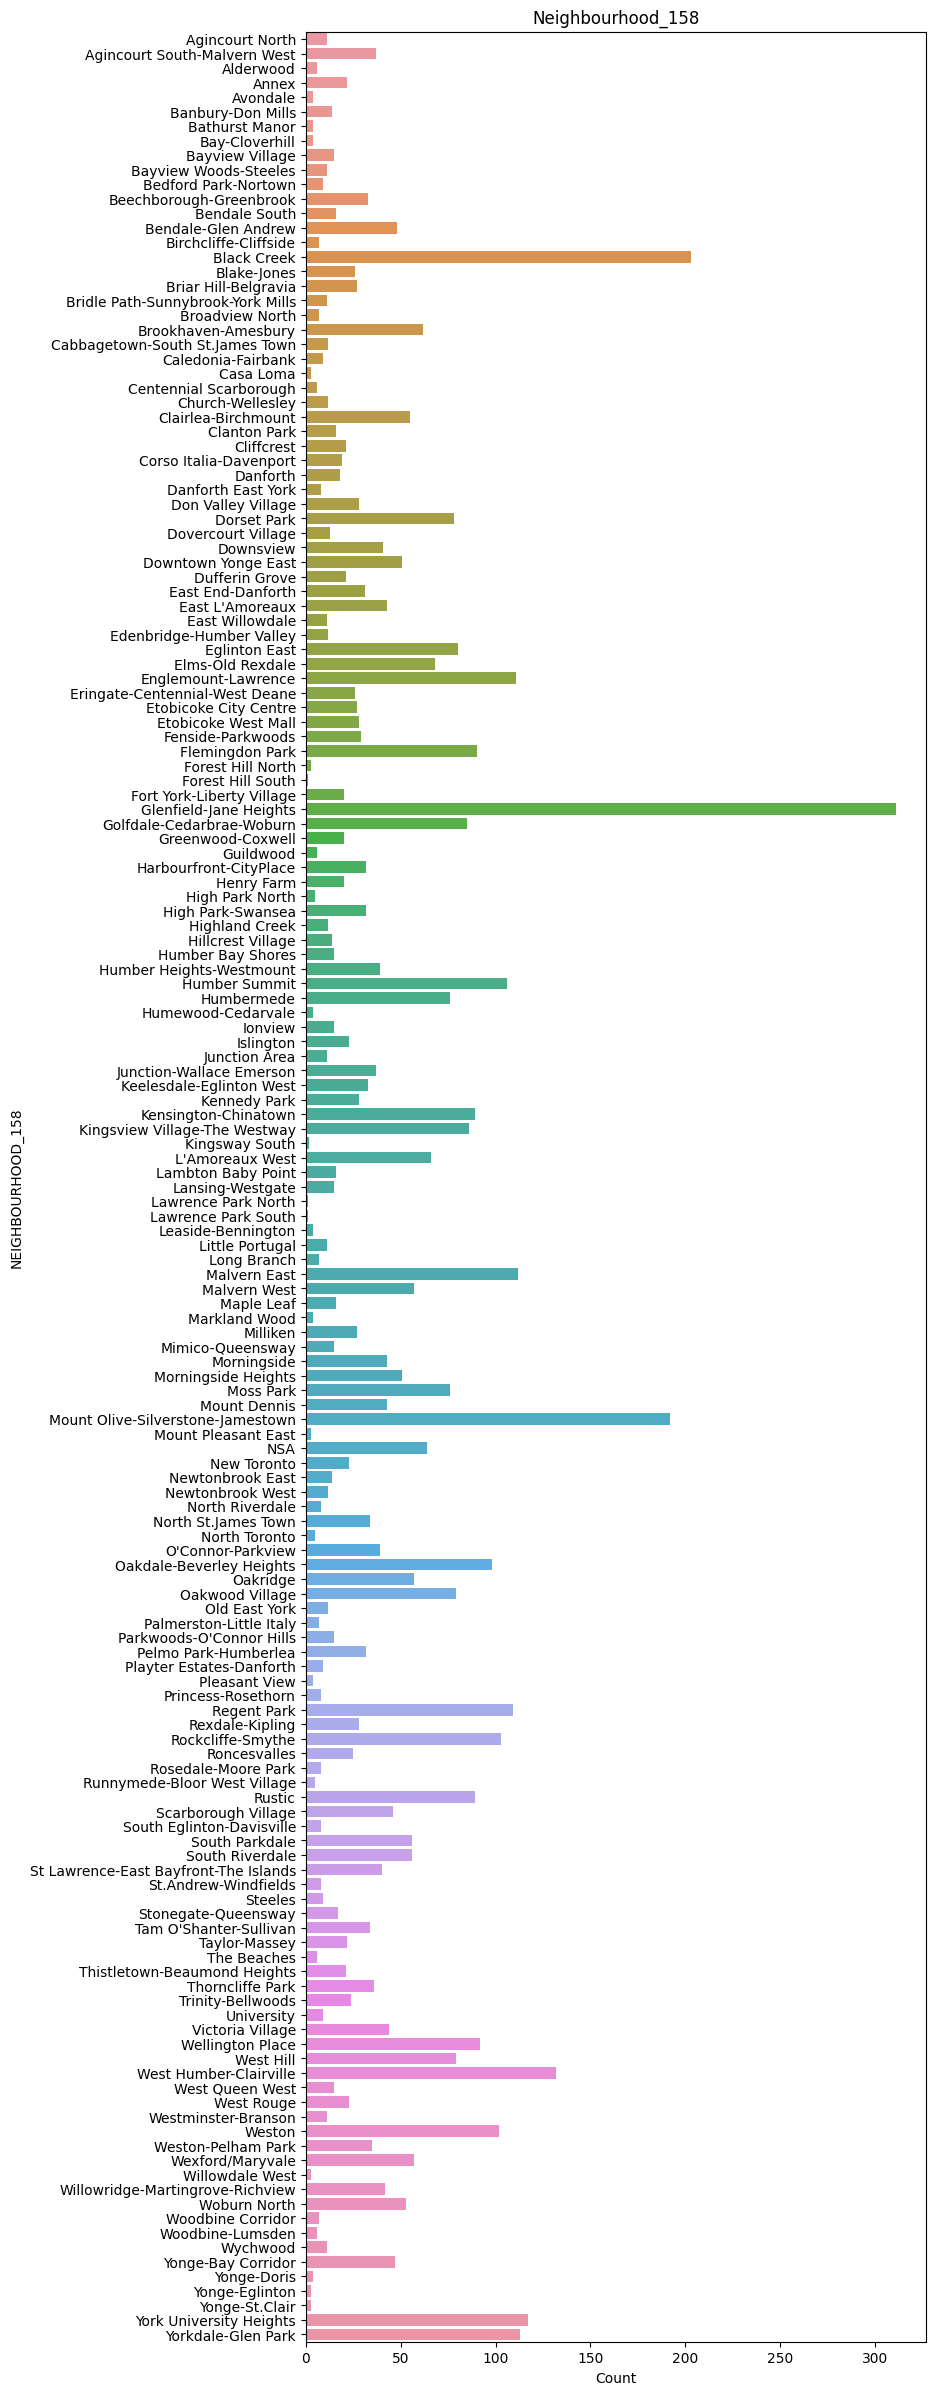

In [127]:
# histograms of numeric columns
data.hist(figsize=(12,10))
plt.show()

warnings.filterwarnings("ignore")
# plots for non-numeric columns
plt.figure(figsize=(8,30))
neighbourhood140 = data.groupby('NEIGHBOURHOOD_140')
sns.barplot(x = neighbourhood140['EVENT_UNIQUE_ID'].count(), y = neighbourhood140['EVENT_UNIQUE_ID'].count().index)
plt.xlabel("Count")
plt.title("Neighbourhood_140")
plt.show()

plt.figure(figsize=(8,30))
neighbourhood158 = data.groupby('NEIGHBOURHOOD_158')
sns.barplot(x = neighbourhood158['EVENT_UNIQUE_ID'].count(), y = neighbourhood158['EVENT_UNIQUE_ID'].count().index)
plt.xlabel("Count")
plt.title("Neighbourhood_158")
plt.show()

# Insights and Rationale

* As was shown above, the data did not contain any duplicates. This data was not expected to contain any duplicates due to its nature, police databases are typically meticulously maintained and each item in this data does supposedly have a unique identifier attached to it. Despite these facts one can never assume that supplied data is clean data, which is why the data was checked for duplicates.

* The *x* and *y* columns have the exact same information as the *LONG_WGS84* and *LAT_WGS84* columns, so the *x* and *y* columns will be dropped (this will be verified below)    

* The *OCC_DOY* column will be dropped because it does not contain any new information. The information held in this column could be found from the columns that contain the month and day of the month of the event.   

* The *OCC_DATE* column will be dropped as it contains information that is present in the other columns.

* The *NEIGHBOURHOOD_140* column will be dropped since it is the older neighbourhood structure of the city. *NEIGHBOURHOOD_158* will be used during analyses as it is the newer neighbourhood structure of the city. *HOOD_140* will also be dropped as it is simply the numerical indetifiers of the neihgbourhoods appearing in *NEIGHBOURHOOD_140*

* Any row that contains *NSA* in the *NEIGHBOURHOOD_158* column will be deleted. No amount of imputation could figure out what the missing value would be to a reasonable degree of accuracy, given that they are string values. Attempting to impute these values would likely introduce incorrect data and falsify the results.
  
  * The *HOOD_140* and *HOOD_158* columns were not examined because they are numerical identifiers of the neighbourhood columns mentioned in the point above. Meaning that if a neighbourhood column contains *NSA* for a column, then the hood column does as well. The *HOOD_158* column will be dropped because it is simply a numerical analogue of *NEIGHBOURHOOD_158* and will not be not critical to the analysis.

  * One final note, NSA stands for Not Specified Area   

* From the above statistics and info, it appears that the numeric columns have no null entries and do not need to be cleaned   

* Any row that contains either a longitude or latitude of 0 must be cleaned. These values represent the coordinates of the nearest major to the site of the crime. This is discussed further down below, after the neighbourhood columns have been cleaned.   


In [128]:
# verify that columns X and Y contain the same information as columns LONG_WGS84 and LAT_WGS84

if len(data.X) != len(data.LONG_WGS84):
    print("length diff")
else:
    for i in range(1, len(data.X) + 1):
        if int(data.X[i]) != int(data.LONG_WGS84[i]):
            print("not same")
            break
    else:
        print("same")


if len(data.Y) != len(data.LAT_WGS84):
    print("length diff")
else:
    for i in range(1, len(data.Y) + 1):
        if int(data.Y[i]) != int(data.LAT_WGS84[i]):
            print("not same")
            break
    else:
        print("same")

same
same


In [129]:
# begin cleaning data

# drop columns mentioned above
data = data.drop(['X', 'Y', 'OCC_DOY', 'NEIGHBOURHOOD_140', 'HOOD_140', 'HOOD_158'], axis=1)

# find and drop rows containing "NSA"
data = data[data['NEIGHBOURHOOD_158'] != "NSA"]

In [130]:
# Verify cleaning took effect
data.info()

# Check if any row has a latitude of 0
data[data['LAT_WGS84'] == 0]

<class 'pandas.core.frame.DataFrame'>
Index: 5643 entries, 1 to 5707
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVENT_UNIQUE_ID    5643 non-null   object 
 1   OCC_DATE           5643 non-null   object 
 2   OCC_YEAR           5643 non-null   int64  
 3   OCC_MONTH          5643 non-null   object 
 4   OCC_DOW            5643 non-null   object 
 5   OCC_DAY            5643 non-null   int64  
 6   OCC_HOUR           5643 non-null   int64  
 7   OCC_TIME_RANGE     5643 non-null   object 
 8   DIVISION           5643 non-null   object 
 9   DEATH              5643 non-null   int64  
 10  INJURIES           5643 non-null   int64  
 11  NEIGHBOURHOOD_158  5643 non-null   object 
 12  LONG_WGS84         5643 non-null   float64
 13  LAT_WGS84          5643 non-null   float64
dtypes: float64(2), int64(5), object(7)
memory usage: 661.3+ KB


Empty DataFrame
Columns: [EVENT_UNIQUE_ID, OCC_DATE, OCC_YEAR, OCC_MONTH, OCC_DOW, OCC_DAY, OCC_HOUR, OCC_TIME_RANGE, DIVISION, DEATH, INJURIES, NEIGHBOURHOOD_158, LONG_WGS84, LAT_WGS84]
Index: []

As can be seen in the cell above, after cleaning the data, no records in which the latitude is 0 exist. No further data cleaning is necessary.

# A word about outliers

* Outliers in this data are significant  

* There are clearly outliers present in the latitudes, the values of 0 were outliers but they were removed for reasons previously explained.   

* An outlier could be classified as a shooting with a significant amount of injuries, or perhaps a large number of shootings in one day. This data is significant and should not be excluded, as a high amount of shootings in a single data is not something that must be corrected or ignored. 

In [131]:
data.describe()

OCC_YEAR      OCC_DAY     OCC_HOUR        DEATH     INJURIES   
count  5643.000000  5643.000000  5643.000000  5643.000000  5643.000000  \
mean   2014.532164    15.905369    12.079745     0.122984     0.486443   
std       5.448039     8.824548     8.685902     0.350381     0.781489   
min    2004.000000     1.000000     0.000000     0.000000     0.000000   
25%    2010.000000     8.000000     3.000000     0.000000     0.000000   
50%    2016.000000    16.000000    15.000000     0.000000     0.000000   
75%    2019.000000    23.000000    20.000000     0.000000     1.000000   
max    2022.000000    31.000000    23.000000     3.000000    24.000000   

        LONG_WGS84    LAT_WGS84  
count  5643.000000  5643.000000  
mean    -79.415076    43.719079  
std       0.116379     0.048917  
min     -79.625565    43.587343  
25%     -79.512482    43.678879  
50%     -79.438373    43.721312  
75%     -79.327105    43.755510  
max     -79.122053    43.838274

# Preliminary Data Groupings

* From the above descriptive statistics:   

  * The median of injuries of the shootings appears to be 0, while the mean injuries is approximately 0.5   

  * The mean amounts of deaths per shooting is 0.122 while the median is 0   

* Above the amount of shootings per neighbourhood was also plotted. This data will be further analyzed below. A potential classification could be the amounts of shootings, for example neighbourhoods exceeding the median (or 50% percentile) of shootings could be classified as a frequent shootings neighbourhood. A neighbourhood exceeding the 75% quartile could be classified as a high shooting rate neighbourhood, these classifications will be implemented below.   

  * A low shooting count neighbourhood is one with a total amount of shootings below the median amount  

  * A medium shooting count neighbourhood is one with a total amount of shootings above the median amount but below the 75% percentile amount   

  * A high shooting count neighbourhood is one with a total amount of shootings above the 75% percentile

A column will be added to the dataframe to represent the ranking of a given neighbourhood (1 = low amount of shootings, 2 = medium amount of shootings, 3 = high amount of shootings). Furthermore, columns will be added for the following rankings: amount of injuries in shootings, amount of deaths in shootings and the frequency of shootings per year. The rankings will follow an identical scheme and process as the rankings of totals amount of shootings did above, with 1 representing the lowest ranking and 3 representing the highest ranking.     

Once all of the rankings have been added to the dataframe, a score will be assigned to each neighbourhood. This score will be expanded upon below but will be used to assign a final rank to each neighbourhood.

In [132]:
# group data by neighbourhood
neighbourhood158 = data.groupby('NEIGHBOURHOOD_158')

# get descriptive statistics of shootings in the neighbourhood
neighbourhood158['EVENT_UNIQUE_ID'].count().describe()

# save the values into variables
medianShootingAmount = 21
highShootingAmount = 45.5

# convert this to a dataframe, and name it
shootingsDf = neighbourhood158['EVENT_UNIQUE_ID'].count().to_frame()
shootingsDf = shootingsDf.unstack('NEIGHBOURHOOD_158')
shootingsDf = shootingsDf.rename('total_shootings', inplace=True)

# create dataframe with each of the neighbourhoods
neighbourhoods = []
for groupKey, group in neighbourhood158:
    neighbourhoods.append(groupKey)

hoodsDF = pd.DataFrame(neighbourhoods, columns=['NEIGHBOURHOOD_158'])

# add a column for the total amount of shooting rankings
hoodsDF['total_shooting_ranking'] = 0

# assign the rankings to this column now

# begin by merging the new dataframe with the existing groups
merge = hoodsDF.merge(shootingsDf, on='NEIGHBOURHOOD_158')

# now assign the ranking based on the total number of shootings
merge.loc[merge['total_shootings'] >= highShootingAmount, 'total_shooting_ranking'] = 3
merge.loc[(merge['total_shootings'] > medianShootingAmount) & (merge['total_shootings'] < highShootingAmount), 'total_shooting_ranking'] = 2
merge.loc[merge['total_shootings'] <= medianShootingAmount, 'total_shooting_ranking'] = 1

# update the original dataset
hoodsDF = merge


In [133]:
shootingsDf.head()

                 NEIGHBOURHOOD_158           
EVENT_UNIQUE_ID  Agincourt North                 11
                 Agincourt South-Malvern West    37
                 Alderwood                        6
                 Annex                           22
                 Avondale                         4
Name: total_shootings, dtype: int64

In [134]:
# now repeat the process to rank neighbourhoods by the amount of injuries that occur in shootings

# descriptive stats to get the 75% and median
injuries = neighbourhood158['INJURIES'].sum().describe()

# get injury data from the groupby
injuries = neighbourhood158['INJURIES'].sum()

medianInjuries = 9
highInjuries = 23

# convert to dataframe
injuriesDF = injuries.to_frame()
injuriesDF = injuriesDF.unstack('NEIGHBOURHOOD_158')
injuriesDF = injuriesDF.rename("total_injuries", inplace=True)

# add column for the ranking
hoodsDF['total_injuries_ranking'] = 0

# assign the rankings to this column now

# begin by merging the new dataframe with the existing groups
merge = hoodsDF.merge(injuriesDF, on='NEIGHBOURHOOD_158')

# now assign the ranking based on the total number of shootings
merge.loc[merge['total_injuries'] >= highInjuries, 'total_injuries_ranking'] = 3
merge.loc[(merge['total_injuries'] > medianInjuries) & (merge['total_injuries'] < highInjuries), 'total_injuries_ranking'] = 2
merge.loc[merge['total_injuries'] <= medianInjuries, 'total_injuries_ranking'] = 1

# update original dataset
hoodsDF = merge

In [135]:
# repeat the process to rank neighbourhoods by the total amount of deaths that have occured in shootings

# descriptive stats to get 75% and median
deaths = neighbourhood158['DEATH'].sum().describe()

medianDeaths = 3
highDeaths = 7

# grab relevant data from groupby
deaths = neighbourhood158['DEATH'].sum()

# convert to dataframe
deathsDF = deaths.to_frame()
deathsDF = deathsDF.unstack('NEIGHBOURHOOD_158')
deathsDF = deathsDF.rename("total_deaths", inplace=True)

# add column for the ranking
hoodsDF['total_deaths_ranking'] = 0

# assign the rankings to this column now

# begin by merging the new dataframe with the existing groups
merge = hoodsDF.merge(deathsDF, on='NEIGHBOURHOOD_158')

# now assign the ranking based on the total number of shootings
merge.loc[merge['total_deaths'] >= highDeaths, 'total_deaths_ranking'] = 3
merge.loc[(merge['total_deaths'] > medianDeaths) & (merge['total_deaths'] < highDeaths), 'total_deaths_ranking'] = 2
merge.loc[merge['total_deaths'] <= medianDeaths, 'total_deaths_ranking'] = 1

# update original dataset
hoodsDF = merge

In [136]:
# finally repeat the process to rank the neighbourhoods by the amount of shootings that have occurred within the last 5 years (2017-2022)

recentData = data[data['OCC_YEAR'] >= 2017]

# group data by neighbourhood
neighbourhood158 = recentData.groupby('NEIGHBOURHOOD_158')

# get descriptive statistics of shootings in the neighbourhood
neighbourhood158['EVENT_UNIQUE_ID'].count().describe()
medianShootings = 11
highShootings = 23

# grab relevant data from groupby
shootings = neighbourhood158['EVENT_UNIQUE_ID'].count()

# convert to dataframe
shootingsDF = shootings.to_frame()
shootingsDF = shootingsDF.unstack('NEIGHBOURHOOD_158')
shootingsDF = shootingsDF.rename("total_shootings_5yrs", inplace=True)

# add column for the ranking
hoodsDF['total_shootings_5yrs_ranking'] = 0

# assign the rankings to this column now

# begin by merging the new dataframe with the existing groups
merge = hoodsDF.merge(shootingsDF, on='NEIGHBOURHOOD_158')

# now assign the ranking based on the total number of shootings
merge.loc[merge['total_shootings_5yrs'] >= highShootings, 'total_shootings_5yrs_ranking'] = 3
merge.loc[(merge['total_shootings_5yrs'] > medianShootings) & (merge['total_shootings_5yrs'] < highShootings), 'total_shootings_5yrs_ranking'] = 2
merge.loc[merge['total_shootings_5yrs'] <= medianShootings, 'total_shootings_5yrs_ranking'] = 1

# update original dataset
hoodsDF = merge


# Scoring

Now each neighbourhood has a ranking for how many total shootings have occurred there, how many total injuries have occurred as a result of the shootings, how many total deaths have occurred as a result of the shootings and how many shootings have occurred in the past 5 years.     

Combined these rankings will be used to determine a final score for each neighbourhood. Given that there are 4 rank categories, each with a maximum rank of 3, the maximum possible rank for a neighbourhood is 12. This would mean that a neighbourhood with a score of 12 is at the highest possible risk for shootings to occur, these shootings often result in high amounts of injuries / deaths and many shootings have been occurring in recent years.

The score will be calculated as a simple sum of the ranks with no weights applied. Applying weights is something that can be explored if it is decided that a particular metric is more meaningful than another. But at this time, there is no rationale for weighting one metric more than another, doing so may risk introducing an unwanted bias.

In [137]:
# calculate the score
hoodsDF['score'] = hoodsDF['total_shooting_ranking'] + hoodsDF['total_injuries_ranking'] + hoodsDF['total_deaths_ranking'] + hoodsDF['total_shootings_5yrs_ranking']

# sort dataframe by score
hoodsDF.sort_values(by='score', ascending=False, inplace=True)

# display all values
hoodsDF.head(50)

NEIGHBOURHOOD_158  total_shooting_ranking   
76                         L'Amoreaux West                       3  \
42                           Eglinton East                       3   
44                     Englemount-Lawrence                       3   
49                         Flemingdon Park                       3   
53                  Glenfield-Jane Heights                       3   
54               Golfdale-Cedarbrae-Woburn                       3   
64                           Humber Summit                       3   
65                              Humbermede                       3   
73                    Kensington-Chinatown                       3   
74           Kingsview Village-The Westway                       3   
83                            Malvern East                       3   
84                            Malvern West                       3   
91                               Moss Park                       3   
93       Mount Olive-Silverstone-Jamestown                       3   
102               Oakdale-Beverley Heights                       3   
104                        Oakwood Village                       3   
112                            Regent Park                       3   
114                      Rockcliffe-Smythe                       3   
117                                 Rustic                       3   
120                         South Parkdale                       3   
121                        South Riverdale                       3   
134                       Wellington Place                       3   
135                              West Hill                       3   
136                 West Humber-Clairville                       3   
140                                 Weston                       3   
142                       Wexford/Maryvale                       3   
151                York University Heights                       3   
43                        Elms-Old Rexdale                       3   
152                     Yorkdale-Glen Park                       3   
15                             Black Creek                       3   
26                     Clairlea-Birchmount                       3   
33                             Dorset Park                       3   
149                     Yonge-Bay Corridor                       3   
36                     Downtown Yonge East                       3   
20                     Brookhaven-Amesbury                       3   
13                     Bendale-Glen Andrew                       3   
118                    Scarborough Village                       3   
89                             Morningside                       2   
90                     Morningside Heights                       3   
145                           Woburn North                       3   
103                               Oakridge                       3   
1             Agincourt South-Malvern West                       2   
133                       Victoria Village                       2   
63                Humber Heights-Westmount                       2   
11                 Beechborough-Greenbrook                       2   
92                            Mount Dennis                       2   
38                       East End-Danforth                       2   
35                               Downsview                       2   
130                       Thorncliffe Park                       2   
122  St Lawrence-East Bayfront-The Islands                       2   

     total_shootings  total_injuries_ranking  total_injuries   
76                66                       3              27  \
42                80                       3              33   
44               111                       3              36   
49                90                       3              42   
53               311                       3             144   
54                85                       3              37   
64    

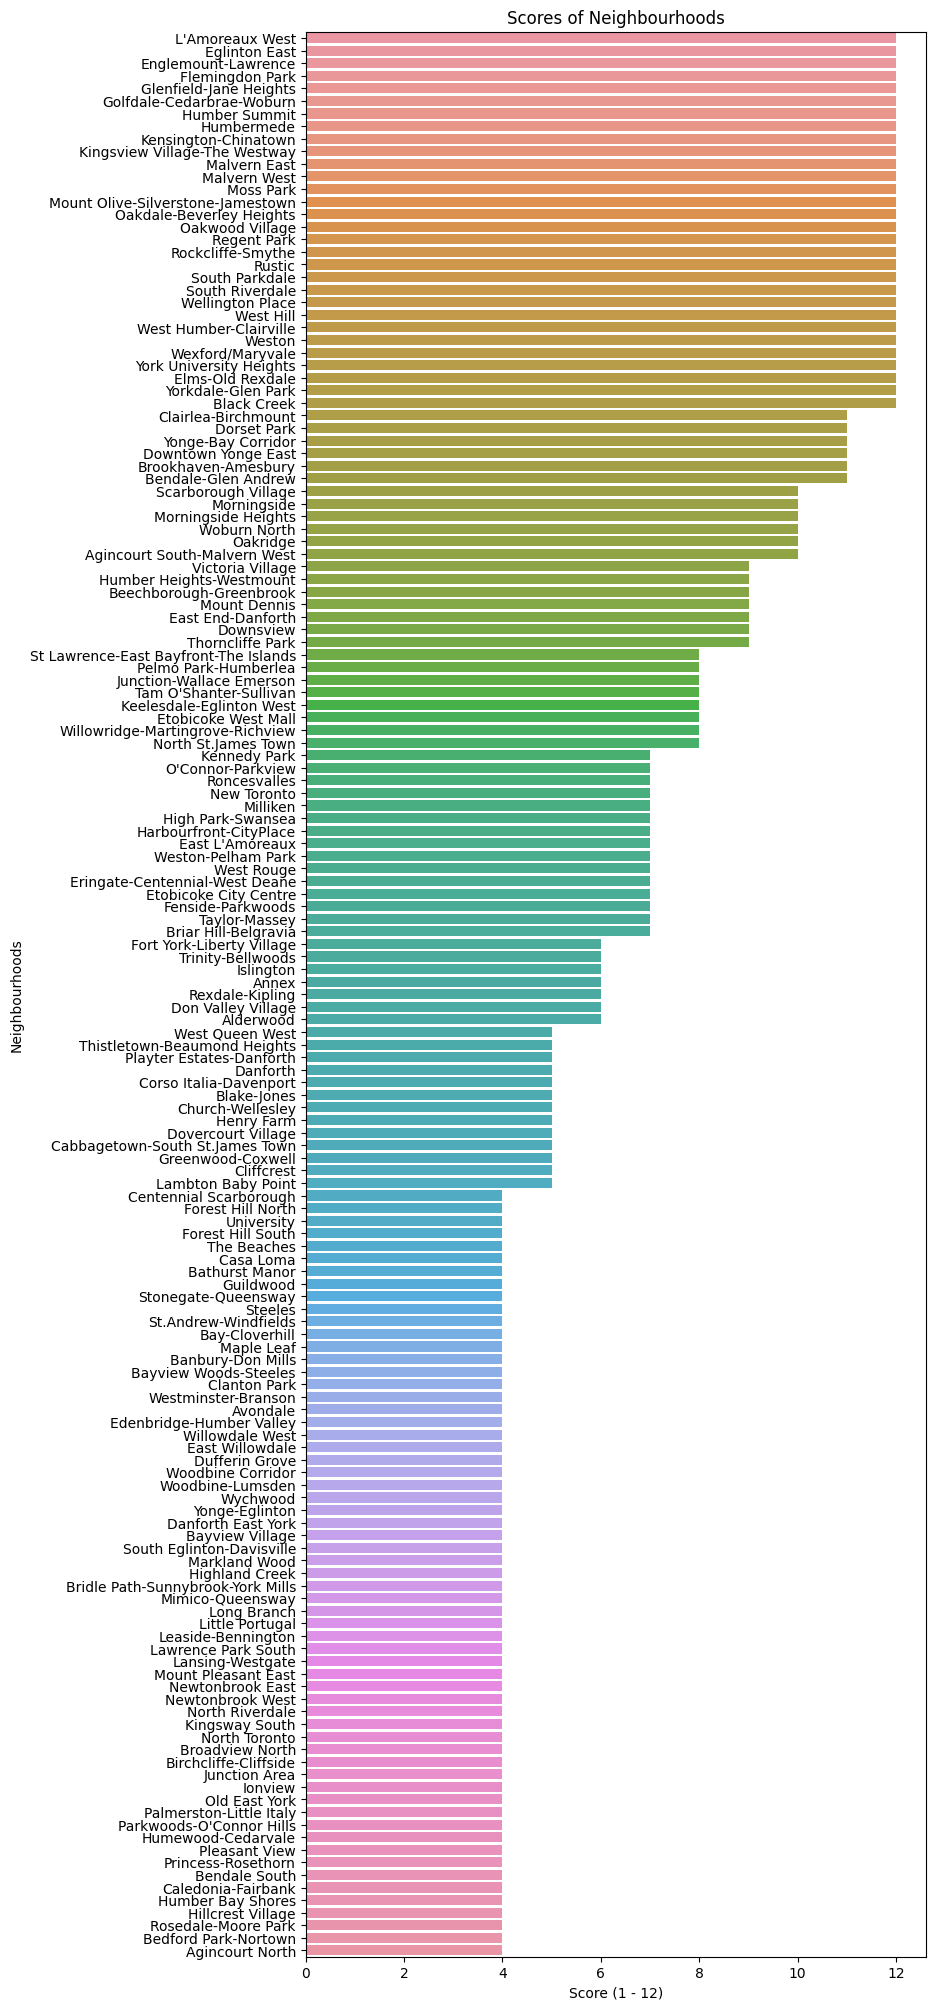

count    153.000000
mean       6.986928
std        3.187118
min        4.000000
25%        4.000000
50%        6.000000
75%       10.000000
max       12.000000
Name: score, dtype: float64

In [138]:
plt.figure(figsize=(8,25))
sns.barplot(x = hoodsDF['score'], y = hoodsDF['NEIGHBOURHOOD_158'])
plt.title('Scores of Neighbourhoods')
plt.xlabel('Score (1 - 12)')
plt.ylabel('Neighbourhoods')
plt.show()

# print some descriptive stats
hoodsDF['score'].describe()

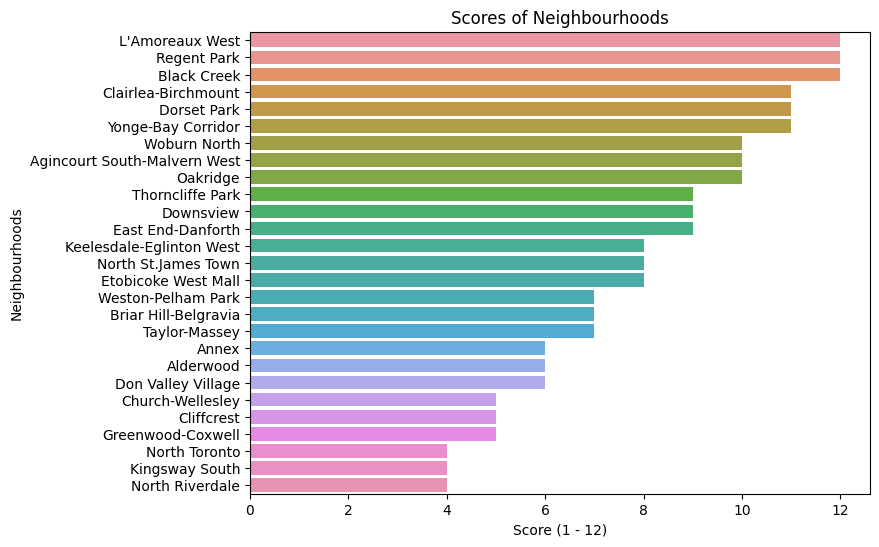

count    27.000000
mean      8.000000
std       2.631174
min       4.000000
25%       6.000000
50%       8.000000
75%      10.000000
max      12.000000
Name: score, dtype: float64

In [139]:
# Sort the DataFrame by the 'score' column in descending order
hoodsDF = hoodsDF.sort_values(by='score', ascending=False)

# Group neighborhoods by 'score' and select a few neighborhoods from each rank
n_neighborhoods_per_rank = 3
hoodsDF_grouped = hoodsDF.groupby('score').head(n_neighborhoods_per_rank)

# Plot the barplot with limited neighborhoods
plt.figure(figsize=(8, 6))
sns.barplot(x=hoodsDF_grouped['score'], y=hoodsDF_grouped['NEIGHBOURHOOD_158'])
plt.title('Scores of Neighbourhoods')
plt.xlabel('Score (1 - 12)')
plt.ylabel('Neighbourhoods')
plt.show()

# Print some descriptive stats for the limited data
hoodsDF_grouped['score'].describe()

# Scoring Resuts

Above it can be seen that there are multiple neighbourhoods with a score of 12. These are the highest risk neighbourhoods, deadly / lethal shootings frequently occur in these neighbourhoods and many shootings have occurred within the last 5 years.    

The scores can be grouped to classify neighbourhoods, the descriptive statistics printed above provide the median score (6) and the 75% quartile score (10). We can consider any neighbourhood with a score greater than or equal to 10 to be at a high risk for lethal shootings to occur, a neighbourhood with a score between 6 and 10 to be at a medium risk for lethal shootings to occur and neighbourhoods with a score less than or equal to 6 to be at a low risk of lethal shootings of occurring.

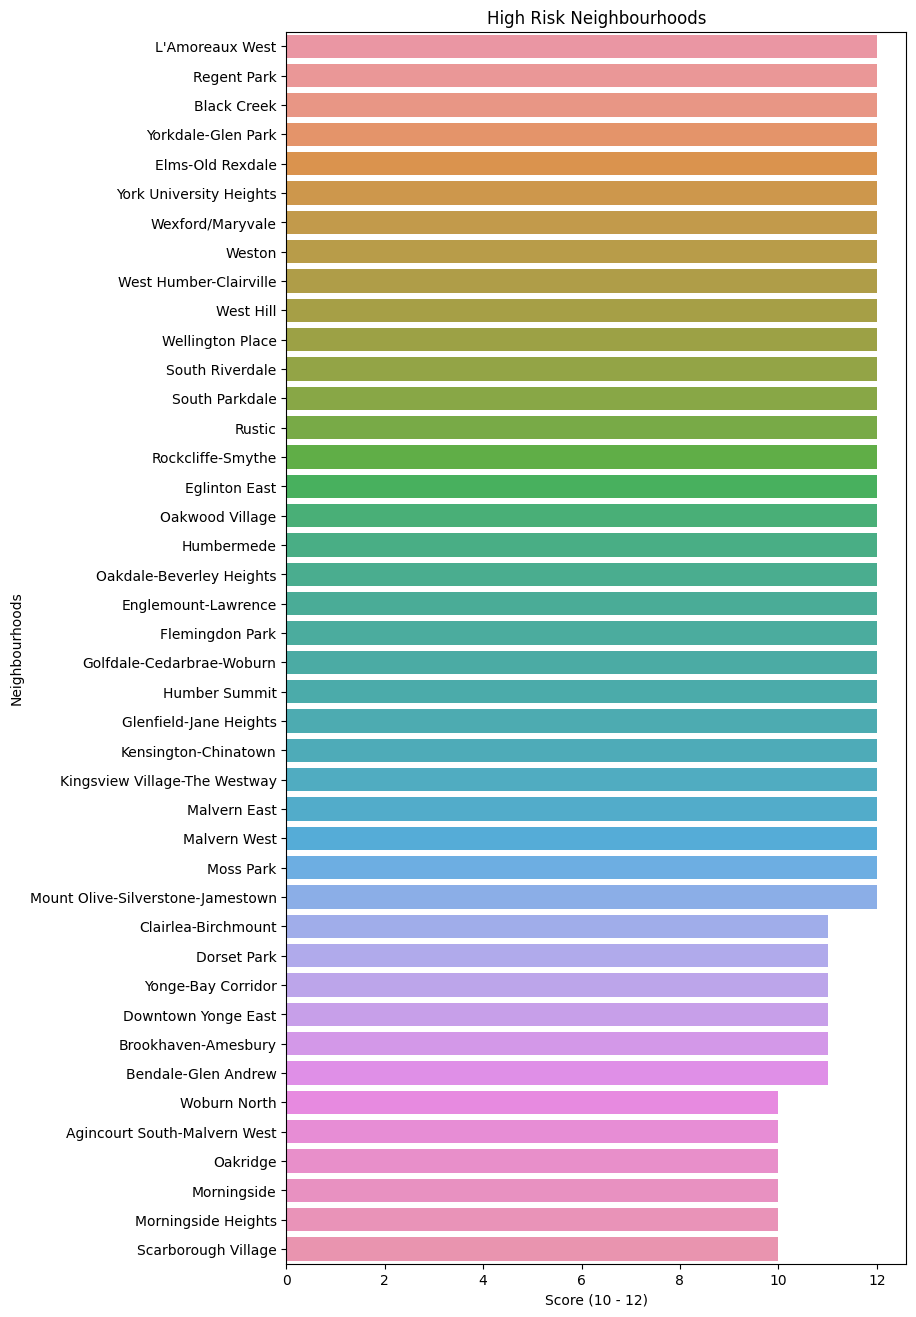

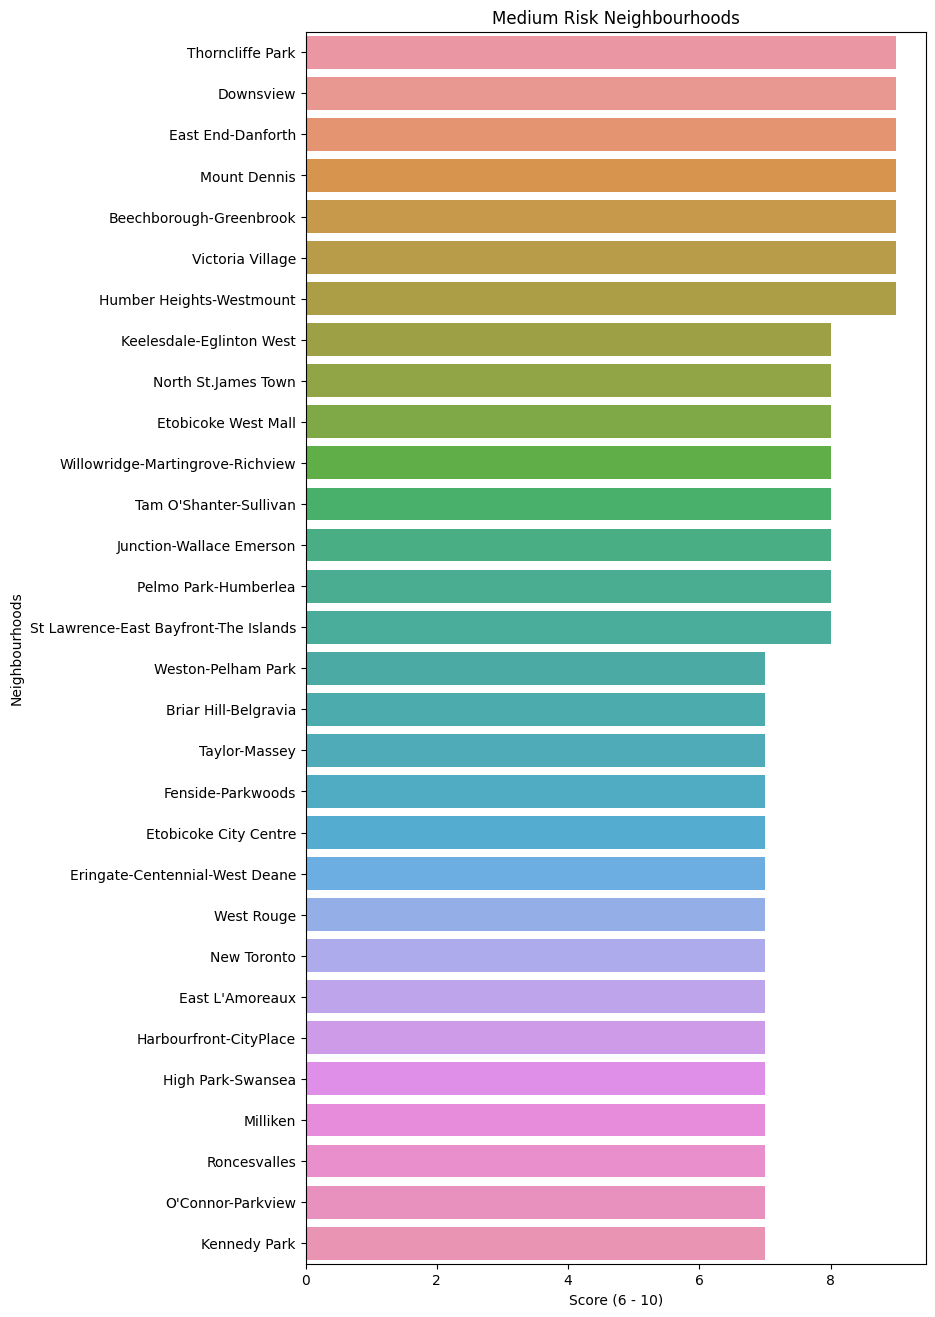

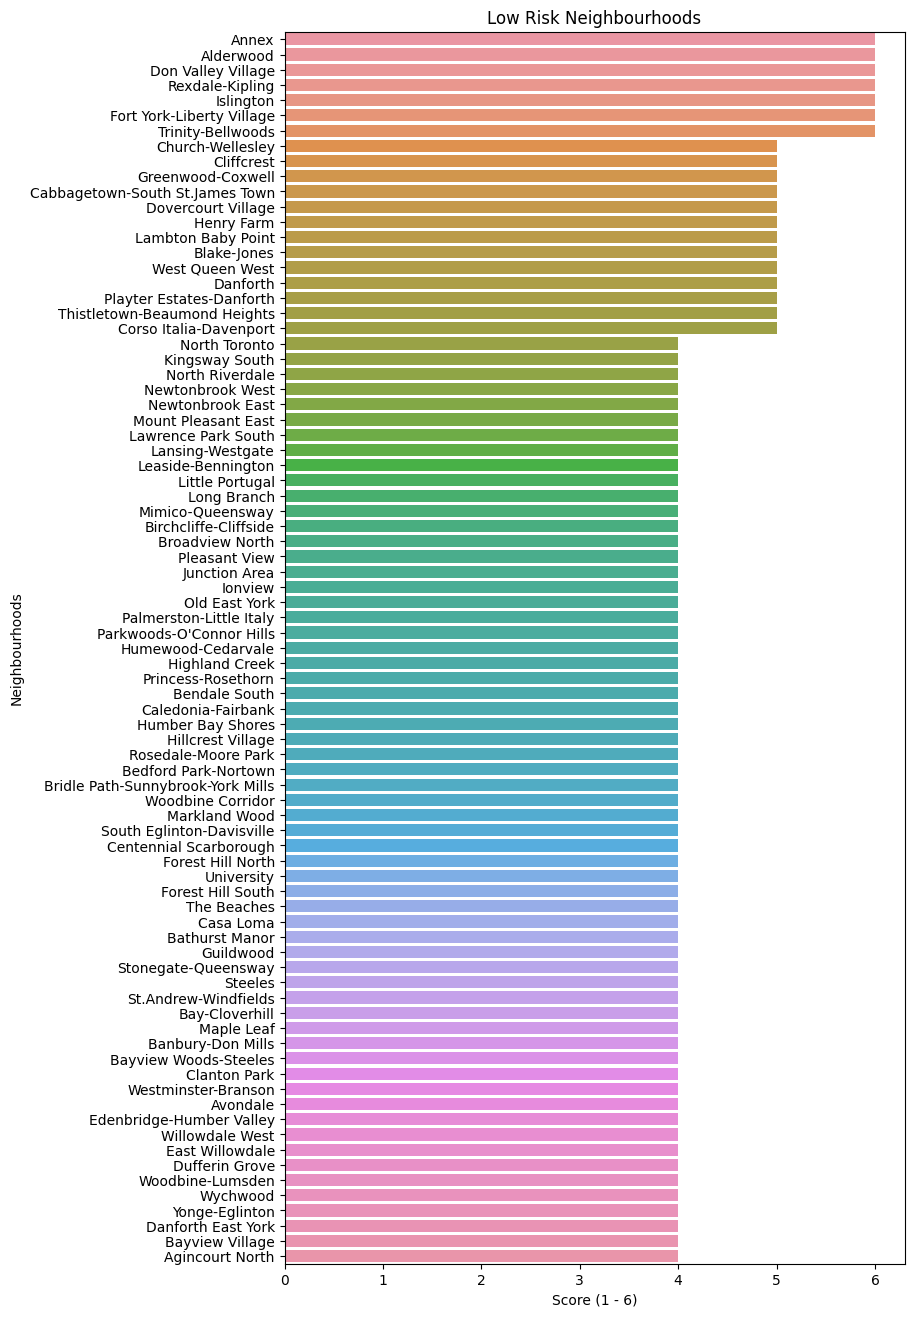

In [140]:
# classifying neighbourhoods by score

medianScore = 6
highScore = 10

highRisk = hoodsDF[hoodsDF['score'] >= highScore]
mediumRisk = hoodsDF[(hoodsDF['score'] < highScore) & (hoodsDF['score'] > medianScore)]
lowRisk = hoodsDF[hoodsDF['score'] <= medianScore]

# display the classifications
plt.figure(figsize=(8,16))
sns.barplot(x = highRisk['score'], y = highRisk['NEIGHBOURHOOD_158'])
plt.title('High Risk Neighbourhoods')
plt.xlabel('Score (10 - 12)')
plt.ylabel('Neighbourhoods')
plt.show()

plt.figure(figsize=(8,16))
sns.barplot(x = mediumRisk['score'], y = mediumRisk['NEIGHBOURHOOD_158'])
plt.title('Medium Risk Neighbourhoods')
plt.xlabel('Score (6 - 10)')
plt.ylabel('Neighbourhoods')
plt.show()

plt.figure(figsize=(8,16))
sns.barplot(x = lowRisk['score'], y = lowRisk['NEIGHBOURHOOD_158'])
plt.title('Low Risk Neighbourhoods')
plt.xlabel('Score (1 - 6)')
plt.ylabel('Neighbourhoods')
plt.show()

-------------------------------------------------------------------------X----------------------------------------------------------------------------------------

TIME ANALYSIS FOR THE ENTIRE DATA (ALL YEARS)


In [141]:
# Count the number of unique neighbourhoods in the high risk data
num_unique_neighbourhoods = highRisk['NEIGHBOURHOOD_158'].nunique()

num_unique_neighbourhoods

42

The sum of the time of occurrence in each region

In [142]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

# Filter the data to only include high risk neighbourhoods
df_high_risk = data[data['NEIGHBOURHOOD_158'].isin(highRisk['NEIGHBOURHOOD_158'])]

# For each neighbourhood, find the time range, day of week, and month with the most shootings
mode_time_range = df_high_risk.groupby('NEIGHBOURHOOD_158')['OCC_TIME_RANGE'].value_counts().groupby(level=0).idxmax()
mode_day_of_week = df_high_risk.groupby('NEIGHBOURHOOD_158')['OCC_DOW'].value_counts().groupby(level=0).idxmax()
mode_month = df_high_risk.groupby('NEIGHBOURHOOD_158')['OCC_MONTH'].value_counts().groupby(level=0).idxmax()
mode_hour = df_high_risk.groupby('NEIGHBOURHOOD_158')['OCC_HOUR'].value_counts().groupby(level=0).idxmax()

# Count the number of neighbourhoods that have each time range, day of week, and month as their mode
mode_time_range_counts = mode_time_range.apply(lambda x: x[1]).value_counts()
mode_day_of_week_counts = mode_day_of_week.apply(lambda x: x[1]).value_counts()
mode_month_counts = mode_month.apply(lambda x: x[1]).value_counts()
mode_hour_counts = mode_hour.apply(lambda x: x[1]).value_counts()

mode_time_range_counts, mode_day_of_week_counts, mode_month_counts

(count
 Evening    24
 Night      18
 Name: count, dtype: int64,
 count
 Sunday       20
 Saturday      7
 Wednesday     5
 Friday        4
 Monday        3
 Tuesday       2
 Thursday      1
 Name: count, dtype: int64,
 count
 August       9
 July         9
 September    5
 May          4
 October      3
 December     3
 April        2
 March        2
 January      2
 June         1
 November     1
 February     1
 Name: count, dtype: int64)

In [143]:
mode_hour_counts

count
0     20
23     6
2      4
22     4
21     3
19     2
1      1
4      1
3      1
Name: count, dtype: int64

In [144]:
df_high_risk = data[data['NEIGHBOURHOOD_158'].isin(highRisk['NEIGHBOURHOOD_158'])]

time_range_counts = df_high_risk['OCC_TIME_RANGE'].value_counts()
day_of_week_counts = df_high_risk['OCC_DOW'].value_counts()
month_counts = df_high_risk['OCC_MONTH'].value_counts()
time_range_counts, day_of_week_counts, month_counts

(OCC_TIME_RANGE
 Evening      1521
 Night        1353
 Afternoon     622
 Morning       222
 Name: count, dtype: int64,
 OCC_DOW
 Sunday       675
 Saturday     603
 Monday       524
 Friday       514
 Wednesday    478
 Tuesday      475
 Thursday     449
 Name: count, dtype: int64,
 OCC_MONTH
 August       401
 July         375
 September    360
 May          344
 June         317
 October      304
 April        294
 November     284
 March        282
 January      276
 December     270
 February     211
 Name: count, dtype: int64)

In [145]:
df_high_risk = data[data['NEIGHBOURHOOD_158'].isin(highRisk['NEIGHBOURHOOD_158'])]

# Count the number of deaths and injuries in each time range
time_range_deaths_counts = df_high_risk [df_high_risk ['DEATH'] == 1]['OCC_TIME_RANGE'].value_counts()
time_range_injuries_counts = df_high_risk [df_high_risk ['INJURIES'] > 0]['OCC_TIME_RANGE'].value_counts()

time_range_deaths_counts, time_range_injuries_counts

(OCC_TIME_RANGE
 Evening      159
 Night        134
 Afternoon     81
 Morning       23
 Name: count, dtype: int64,
 OCC_TIME_RANGE
 Evening      616
 Night        547
 Afternoon    257
 Morning       68
 Name: count, dtype: int64)

In [146]:
# Count the number of shootings in each hour for all years
hour_counts = df_high_risk['OCC_HOUR'].value_counts().sort_values(ascending=False)

hour_counts

OCC_HOUR
0     432
23    321
22    319
21    292
2     249
1     233
3     214
19    211
20    208
18    170
17    147
4     142
15    115
16    113
14     95
5      83
13     78
12     74
11     51
6      42
10     36
9      36
8      29
7      28
Name: count, dtype: int64

Shooting Incidents by year

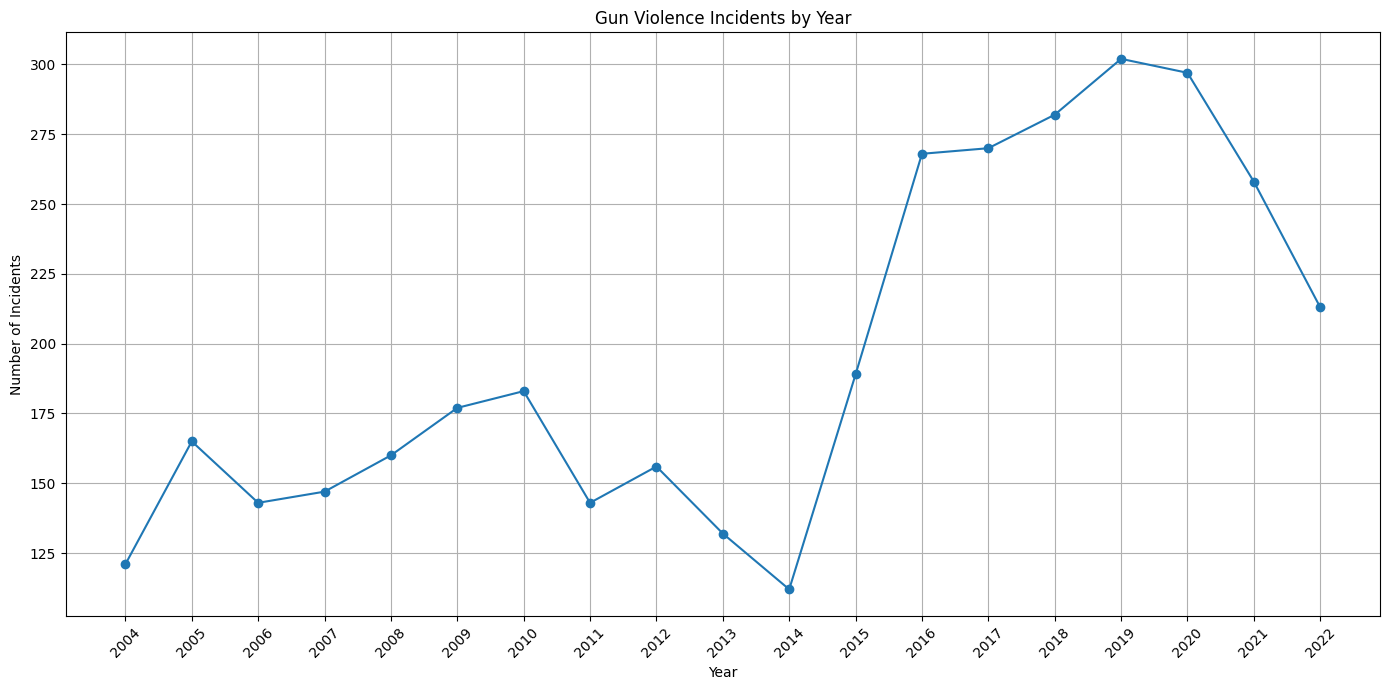

In [147]:
df_high_risk = data[data['NEIGHBOURHOOD_158'].isin(highRisk['NEIGHBOURHOOD_158'])]
# Group by OCC_YEAR and count the number of events per year
gun_violence_by_year = df_high_risk.groupby('OCC_YEAR').size()

# Create a line plot with all years displayed on x-axis
plt.figure(figsize=(14, 7))
plt.plot(gun_violence_by_year.index, gun_violence_by_year.values, marker='o')

# Set the title and labels
plt.title('Gun Violence Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

# Display all years on x-axis
plt.xticks(gun_violence_by_year.index, rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


LAST 5 YEARS

In [148]:
df_high_risk5 = df_high_risk[df_high_risk['OCC_YEAR'] >= 2018] 
time_range_counts_last_5_years = df_high_risk5['OCC_TIME_RANGE'].value_counts()
day_of_week_counts_last_5_years = df_high_risk5['OCC_DOW'].value_counts()
month_counts_last_5_years = df_high_risk5['OCC_MONTH'].value_counts()
time_range_counts_last_5_years, day_of_week_counts_last_5_years, month_counts_last_5_years

(OCC_TIME_RANGE
 Evening      552
 Night        495
 Afternoon    215
 Morning       90
 Name: count, dtype: int64,
 OCC_DOW
 Saturday     225
 Sunday       221
 Wednesday    203
 Monday       198
 Friday       172
 Tuesday      167
 Thursday     166
 Name: count, dtype: int64,
 OCC_MONTH
 August       156
 September    143
 May          136
 July         133
 October      115
 April        114
 June         110
 March        102
 December     102
 November      88
 January       83
 February      70
 Name: count, dtype: int64)

In [149]:
# Count the number of deaths and injuries in each time range
time_range_deaths_counts_last_5_years = df_high_risk5[df_high_risk5 ['DEATH'] == 1]['OCC_TIME_RANGE'].value_counts()
time_range_injuries_counts_last_5_years = df_high_risk5 [df_high_risk5['INJURIES'] > 0]['OCC_TIME_RANGE'].value_counts()

time_range_deaths_counts_last_5_years, time_range_injuries_counts_last_5_years

(OCC_TIME_RANGE
 Evening      53
 Night        44
 Afternoon    27
 Morning       6
 Name: count, dtype: int64,
 OCC_TIME_RANGE
 Evening      198
 Night        164
 Afternoon     84
 Morning       26
 Name: count, dtype: int64)

In [150]:
# Count the number of shootings in each hour for all years
hour_counts_last_5_years = df_high_risk5['OCC_HOUR'].value_counts().sort_values(ascending=False)

hour_counts_last_5_years

OCC_HOUR
23    123
22    123
0     122
21    108
1      94
2      91
3      85
19     74
20     69
4      59
18     55
17     49
5      44
15     44
16     39
14     31
13     30
12     22
6      19
9      16
7      15
8      15
11     14
10     11
Name: count, dtype: int64

In [151]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

# Filter the data to only include high risk neighbourhoods
df_high_risk = data[data['NEIGHBOURHOOD_158'].isin(highRisk['NEIGHBOURHOOD_158'])]

# For each neighbourhood, find the time range, day of week, and month with the most shootings
mode_time_range_last_5_years = df_high_risk5.groupby('NEIGHBOURHOOD_158')['OCC_TIME_RANGE'].value_counts().groupby(level=0).idxmax()
mode_day_of_week_last_5_years = df_high_risk5.groupby('NEIGHBOURHOOD_158')['OCC_DOW'].value_counts().groupby(level=0).idxmax()
mode_month_last_5_years = df_high_risk5.groupby('NEIGHBOURHOOD_158')['OCC_MONTH'].value_counts().groupby(level=0).idxmax()
mode_hour_last_5_years = df_high_risk5.groupby('NEIGHBOURHOOD_158')['OCC_HOUR'].value_counts().groupby(level=0).idxmax()

# Count the number of neighbourhoods that have each time range, day of week, and month as their mode
mode_time_range_counts_last_5_years = mode_time_range_last_5_years.apply(lambda x: x[1]).value_counts()
mode_day_of_week_counts_last_5_years = mode_day_of_week_last_5_years.apply(lambda x: x[1]).value_counts()
mode_month_counts_last_5_years = mode_month_last_5_years.apply(lambda x: x[1]).value_counts()
mode_hour_counts_last_5_years = mode_hour_last_5_years.apply(lambda x: x[1]).value_counts()

mode_time_range_counts_last_5_years, mode_day_of_week_counts_last_5_years, mode_month_counts_last_5_years

(count
 Evening      21
 Night        20
 Afternoon     1
 Name: count, dtype: int64,
 count
 Sunday       11
 Saturday      8
 Monday        6
 Friday        6
 Wednesday     6
 Thursday      3
 Tuesday       2
 Name: count, dtype: int64,
 count
 September    10
 July          6
 May           5
 August        5
 June          4
 January       3
 December      3
 April         2
 October       2
 March         1
 November      1
 Name: count, dtype: int64)

In [152]:
mode_hour_counts_last_5_years

count
23    9
22    7
1     4
21    4
2     4
0     3
19    2
18    2
4     2
17    2
20    1
14    1
3     1
Name: count, dtype: int64

Calculate the probability of shootings in each time range for each neighbourhood

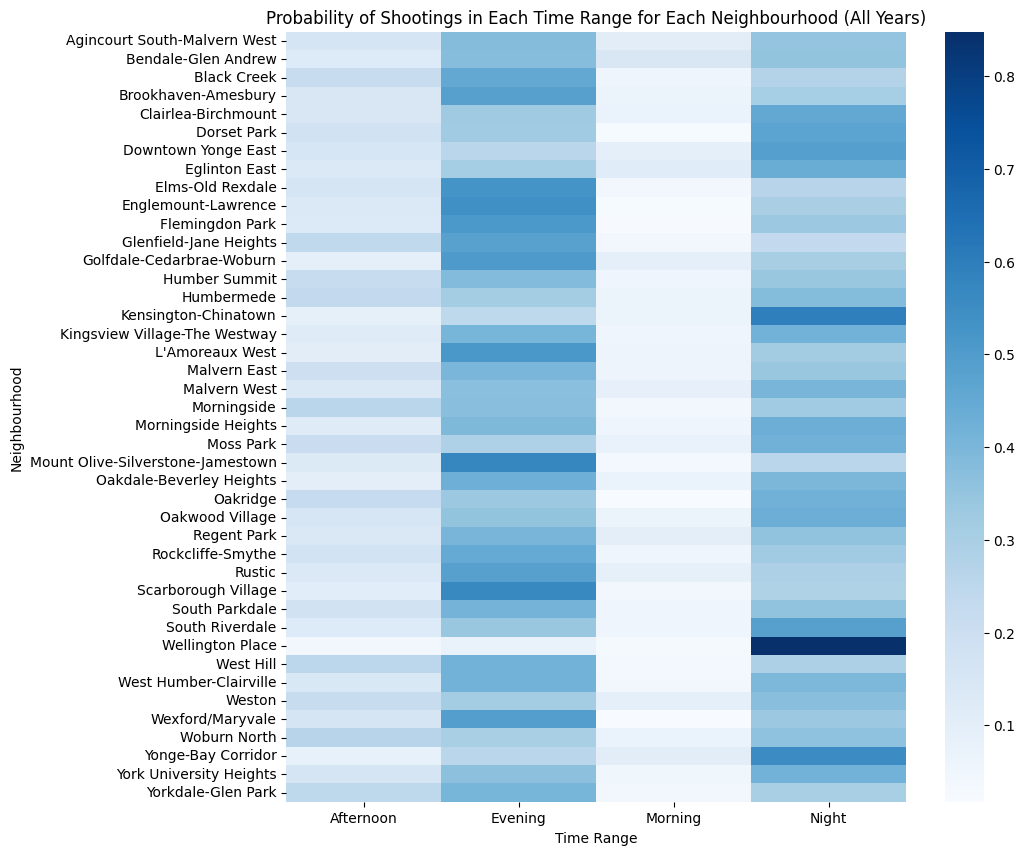

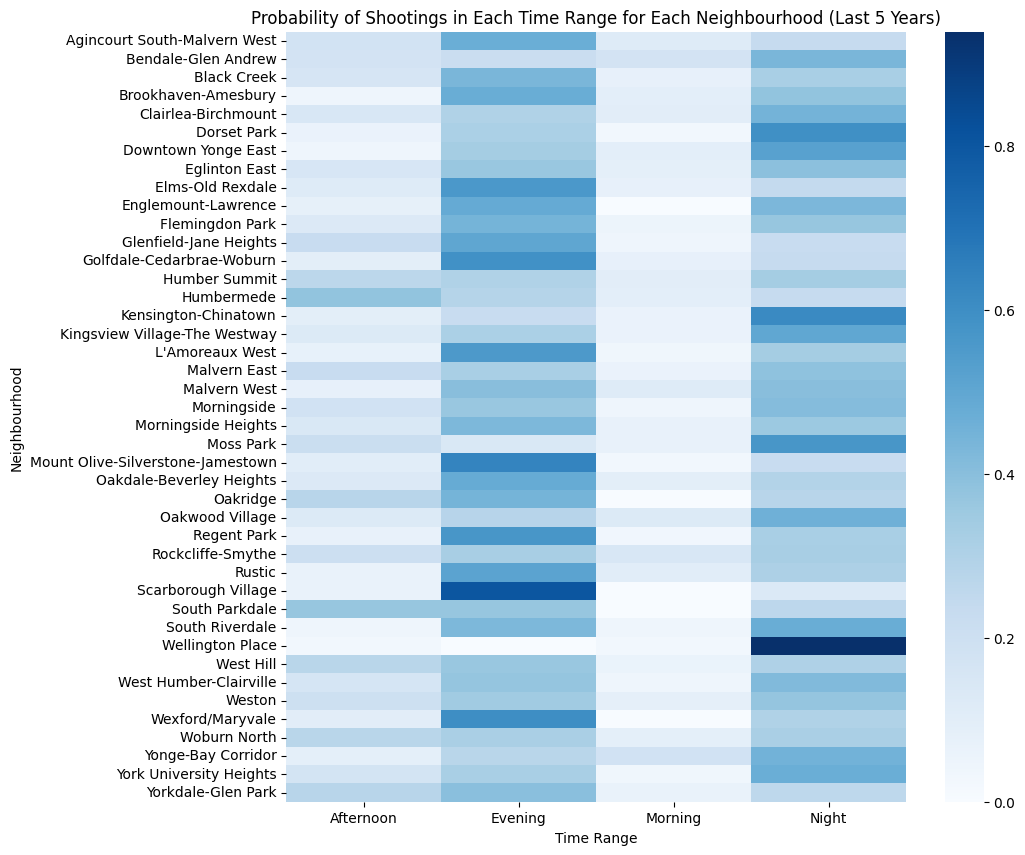

In [153]:
# Calculate the probability of shootings in each time range for each neighbourhood
neighbourhood_time_range_counts = df_high_risk.groupby('NEIGHBOURHOOD_158')['OCC_TIME_RANGE'].value_counts(normalize=True)

# Calculate the probability of shootings in each time range for each neighbourhood in the last 5 years
neighbourhood_time_range_counts_last_5_years = df_high_risk[df_high_risk['OCC_YEAR'] >= 2018].groupby('NEIGHBOURHOOD_158')['OCC_TIME_RANGE'].value_counts(normalize=True)

# Convert the series to a dataframe
df_neighbourhood_time_range = neighbourhood_time_range_counts.unstack().fillna(0)
df_neighbourhood_time_range_last_5_years = neighbourhood_time_range_counts_last_5_years.unstack().fillna(0)

# Create a heatmap for the shooting probabilities in each time range for each neighbourhood
plt.figure(figsize=(10, 10))
sns.heatmap(df_neighbourhood_time_range, cmap='Blues')
plt.title('Probability of Shootings in Each Time Range for Each Neighbourhood (All Years)')
plt.xlabel('Time Range')
plt.ylabel('Neighbourhood')
plt.show()

# Create a heatmap for the shooting probabilities in each time range for each neighbourhood in the last 5 years
plt.figure(figsize=(10, 10))
sns.heatmap(df_neighbourhood_time_range_last_5_years, cmap='Blues')
plt.title('Probability of Shootings in Each Time Range for Each Neighbourhood (Last 5 Years)')
plt.xlabel('Time Range')
plt.ylabel('Neighbourhood')
plt.show()

Calculate the probability of shootings in each month for each neighbourhood

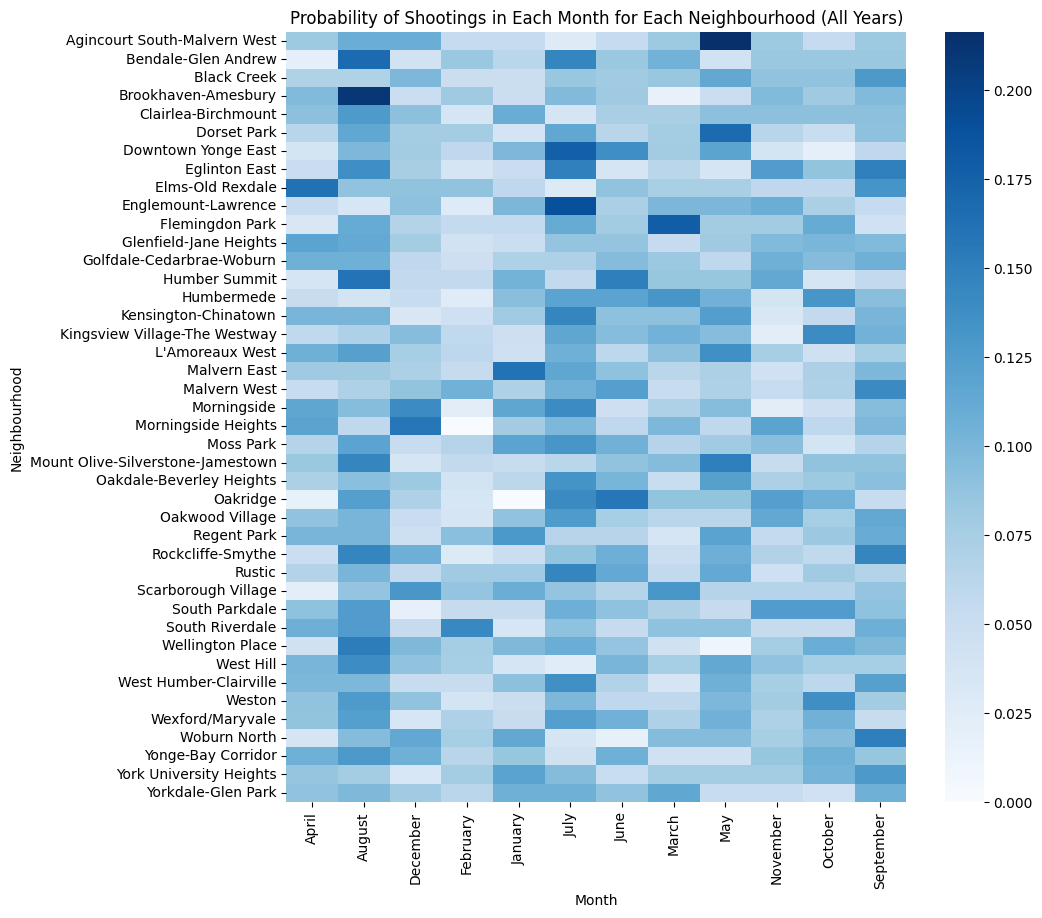

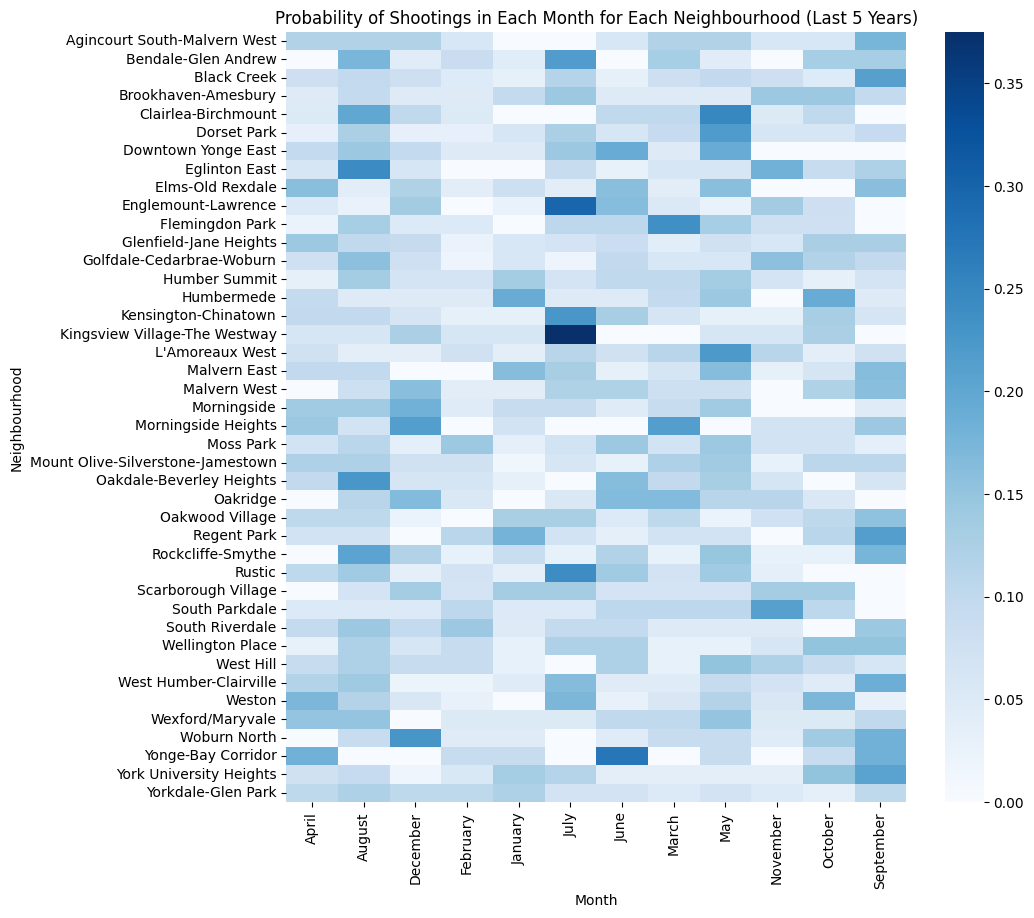

In [154]:
# Calculate the probability of shootings in each month for each neighbourhood
neighbourhood_time_range_counts = df_high_risk.groupby('NEIGHBOURHOOD_158')['OCC_MONTH'].value_counts(normalize=True)

# Calculate the probability of shootings in each month for each neighbourhood in the last 5 years
neighbourhood_time_range_counts_last_5_years = df_high_risk[df_high_risk['OCC_YEAR'] >= 2018].groupby('NEIGHBOURHOOD_158')['OCC_MONTH'].value_counts(normalize=True)

# Convert the series to a dataframe
df_neighbourhood_time_range = neighbourhood_time_range_counts.unstack().fillna(0)
df_neighbourhood_time_range_last_5_years = neighbourhood_time_range_counts_last_5_years.unstack().fillna(0)

# Create a heatmap for the shooting probabilities in each month for each neighbourhood
plt.figure(figsize=(10, 10))
sns.heatmap(df_neighbourhood_time_range, cmap='Blues')
plt.title('Probability of Shootings in Each Month for Each Neighbourhood (All Years)')
plt.xlabel('Month')
plt.ylabel('Neighbourhood')
plt.show()

# Create a heatmap for the shooting probabilities in each month for each neighbourhood in the last 5 years
plt.figure(figsize=(10, 10))
sns.heatmap(df_neighbourhood_time_range_last_5_years, cmap='Blues')
plt.title('Probability of Shootings in Each Month for Each Neighbourhood (Last 5 Years)')
plt.xlabel('Month')
plt.ylabel('Neighbourhood')
plt.show()

Calculate the probability of shootings in each day for each neighbourhood

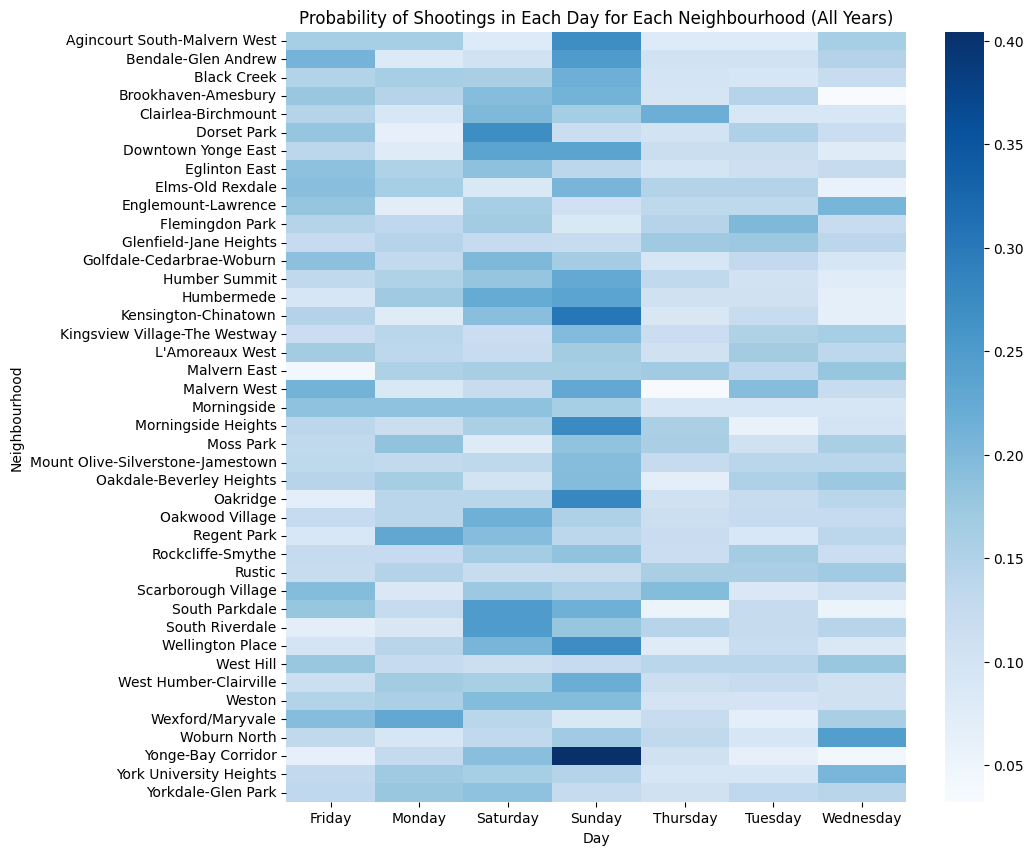

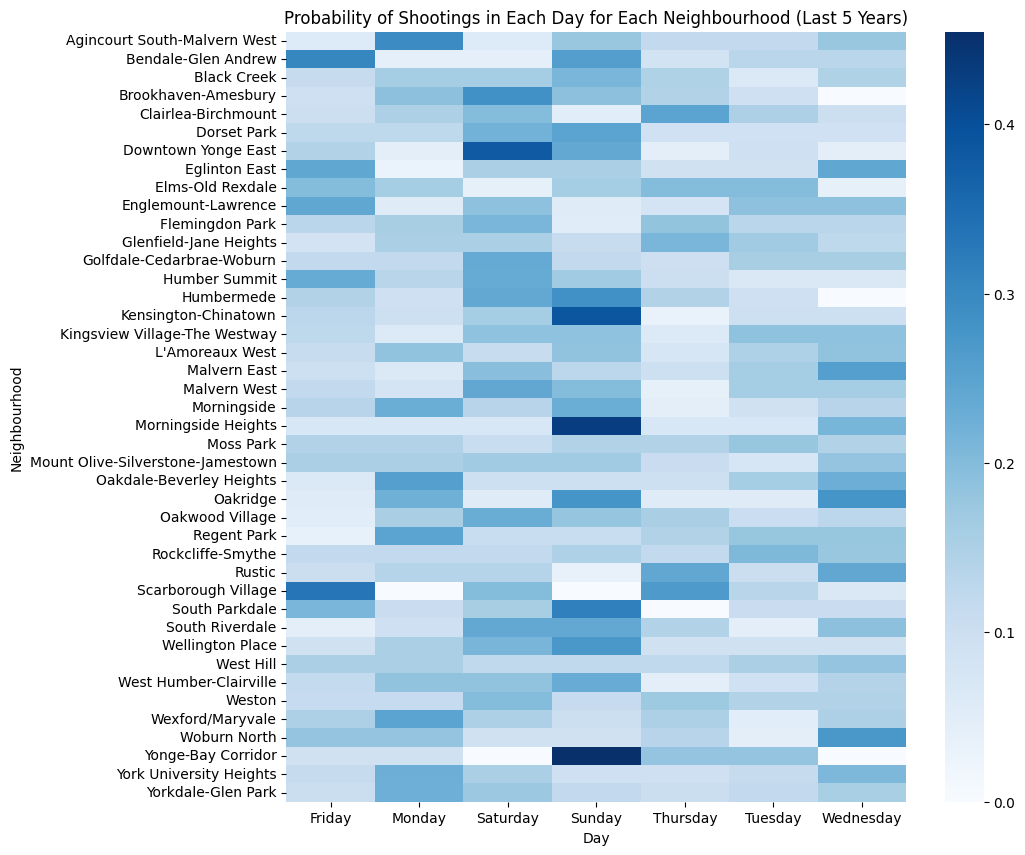

In [155]:
# Calculate the probability of shootings in each day for each neighbourhood
neighbourhood_time_range_counts = df_high_risk.groupby('NEIGHBOURHOOD_158')['OCC_DOW'].value_counts(normalize=True)

# Calculate the probability of shootings in each day for each neighbourhood in the last 5 years
neighbourhood_time_range_counts_last_5_years = df_high_risk[df_high_risk['OCC_YEAR'] >= 2018].groupby('NEIGHBOURHOOD_158')['OCC_DOW'].value_counts(normalize=True)

# Convert the series to a dataframe
df_neighbourhood_time_range = neighbourhood_time_range_counts.unstack().fillna(0)
df_neighbourhood_time_range_last_5_years = neighbourhood_time_range_counts_last_5_years.unstack().fillna(0)

# Create a heatmap for the shooting probabilities in each day for each neighbourhood
plt.figure(figsize=(10, 10))
sns.heatmap(df_neighbourhood_time_range, cmap='Blues')
plt.title('Probability of Shootings in Each Day for Each Neighbourhood (All Years)')
plt.xlabel('Day')
plt.ylabel('Neighbourhood')
plt.show()

# Create a heatmap for the shooting probabilities in each day for each neighbourhood in the last 5 years
plt.figure(figsize=(10, 10))
sns.heatmap(df_neighbourhood_time_range_last_5_years, cmap='Blues')
plt.title('Probability of Shootings in Each Day for Each Neighbourhood (Last 5 Years)')
plt.xlabel('Day')
plt.ylabel('Neighbourhood')
plt.show()

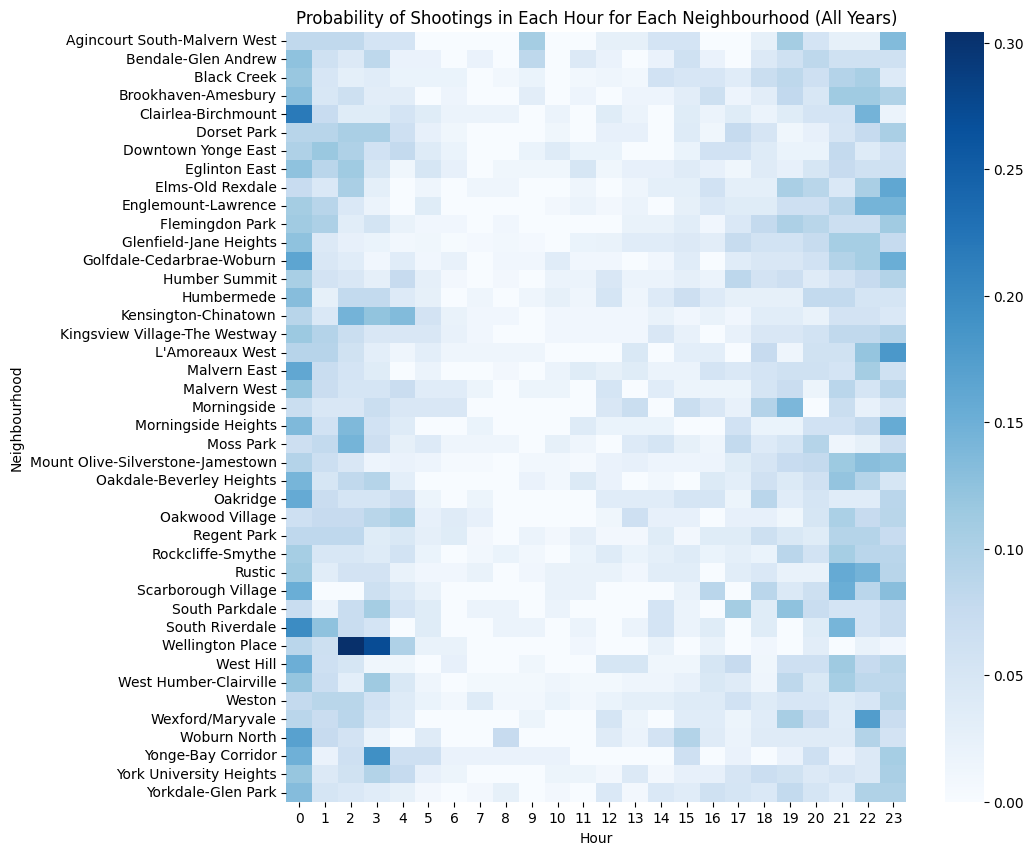

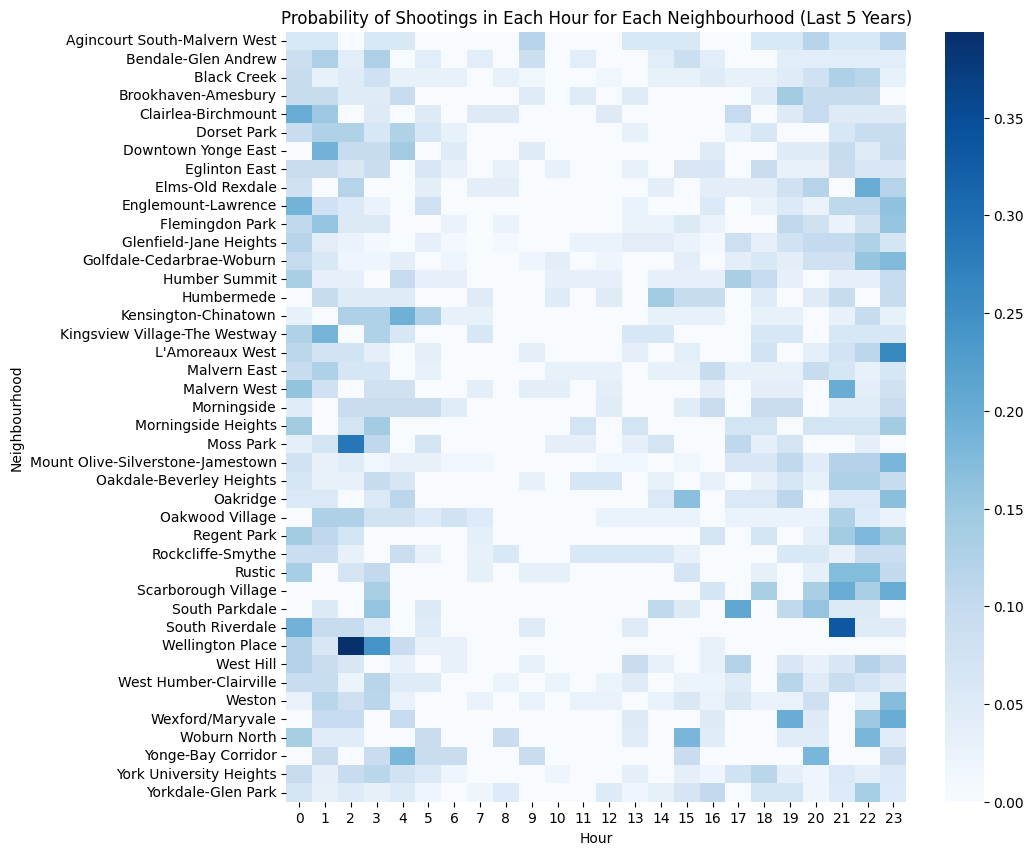

In [156]:
# Calculate the probability of shootings in each hour for each neighbourhood
neighbourhood_time_range_counts = df_high_risk.groupby('NEIGHBOURHOOD_158')['OCC_HOUR'].value_counts(normalize=True)

# Calculate the probability of shootings in each hour for each neighbourhood in the last 5 years
neighbourhood_time_range_counts_last_5_years = df_high_risk[df_high_risk['OCC_YEAR'] >= 2018].groupby('NEIGHBOURHOOD_158')['OCC_HOUR'].value_counts(normalize=True)

# Convert the series to a dataframe
df_neighbourhood_time_range = neighbourhood_time_range_counts.unstack().fillna(0)
df_neighbourhood_time_range_last_5_years = neighbourhood_time_range_counts_last_5_years.unstack().fillna(0)

# Create a heatmap for the shooting probabilities in each hour for each neighbourhood
plt.figure(figsize=(10, 10))
sns.heatmap(df_neighbourhood_time_range, cmap='Blues')
plt.title('Probability of Shootings in Each Hour for Each Neighbourhood (All Years)')
plt.xlabel('Hour')
plt.ylabel('Neighbourhood')
plt.show()

# Create a heatmap for the shooting probabilities in each hour for each neighbourhood in the last 5 years
plt.figure(figsize=(10, 10))
sns.heatmap(df_neighbourhood_time_range_last_5_years, cmap='Blues')
plt.title('Probability of Shootings in Each Hour for Each Neighbourhood (Last 5 Years)')
plt.xlabel('Hour')
plt.ylabel('Neighbourhood')
plt.show()

MORE PLOTS FOR HIGH RISK NEIGHBIRHOODS

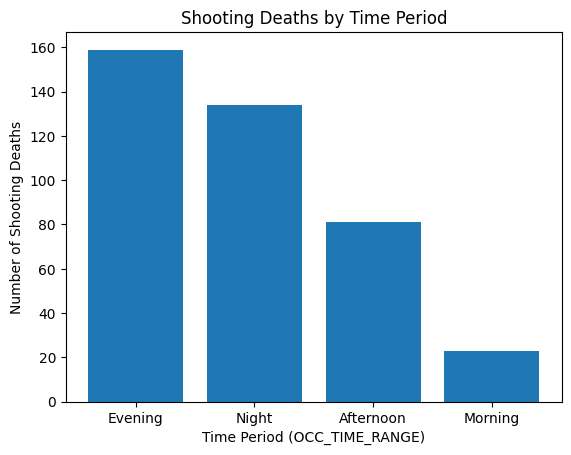

In [157]:
 #Data
occ_time_range = ['Evening', 'Night', 'Afternoon', 'Morning']
deaths_count = [159, 134, 81, 23]

# Create a histogram
plt.bar(occ_time_range, deaths_count)

# Set labels and title
plt.xlabel('Time Period (OCC_TIME_RANGE)')
plt.ylabel('Number of Shooting Deaths')
plt.title('Shooting Deaths by Time Period')

# Show the plot
plt.show()

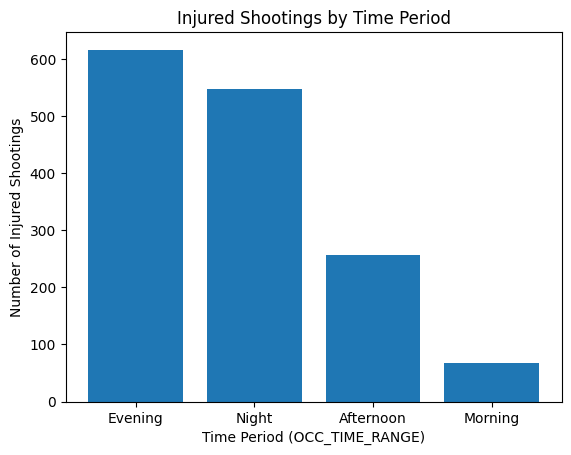

In [158]:
# Data
occ_time_range = ['Evening', 'Night', 'Afternoon', 'Morning']
injured_shootings = [616, 547, 257, 68]

# Create a histogram
plt.bar(occ_time_range, injured_shootings)

# Set labels and title
plt.xlabel('Time Period (OCC_TIME_RANGE)')
plt.ylabel('Number of Injured Shootings')
plt.title('Injured Shootings by Time Period')

# Show the plot
plt.show()

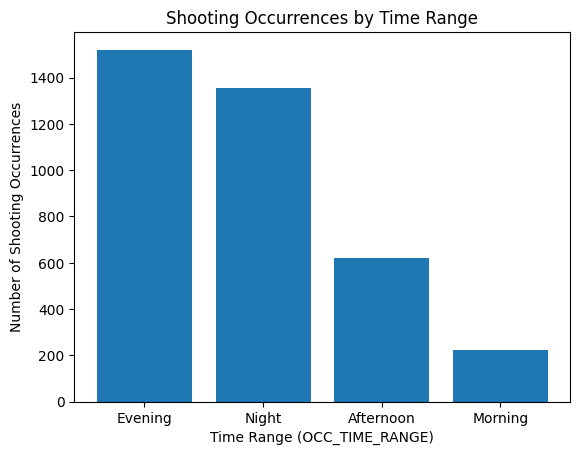

In [159]:
# Data
occ_time_range = ['Evening', 'Night', 'Afternoon', 'Morning']
shooting_occurrences = [1521, 1353, 622, 222]

# Create a histogram
plt.bar(occ_time_range, shooting_occurrences)

# Set labels and title
plt.xlabel('Time Range (OCC_TIME_RANGE)')
plt.ylabel('Number of Shooting Occurrences')
plt.title('Shooting Occurrences by Time Range')

# Show the plot
plt.show()

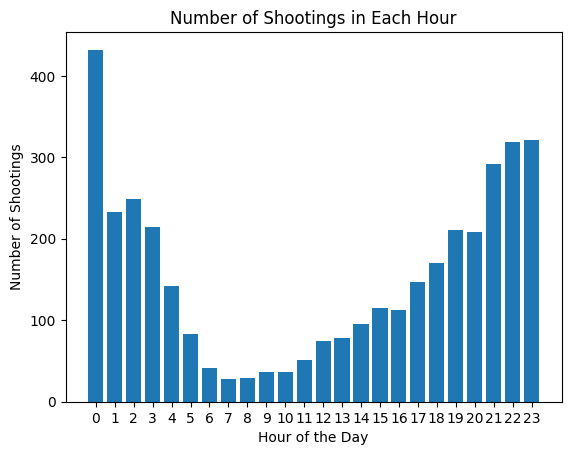

In [160]:
# Data
hours = [0, 23, 22, 21, 2, 1, 3, 19, 20, 18, 17, 4, 15, 16, 14, 5, 13, 12, 11, 6, 10, 9, 8, 7]
shootings_count = [432, 321, 319, 292, 249, 233, 214, 211, 208, 170, 147, 142, 115, 113, 95, 83, 78, 74, 51, 42, 36, 36, 29, 28]

# Create a histogram
plt.bar(hours, shootings_count)

# Set x-ticks to show all hours from 0 to 23
plt.xticks(range(24))

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Shootings')
plt.title('Number of Shootings in Each Hour')

# Show the plot
plt.show()

SAME PLOTS FOR LAST 5 YEARS OF DATA

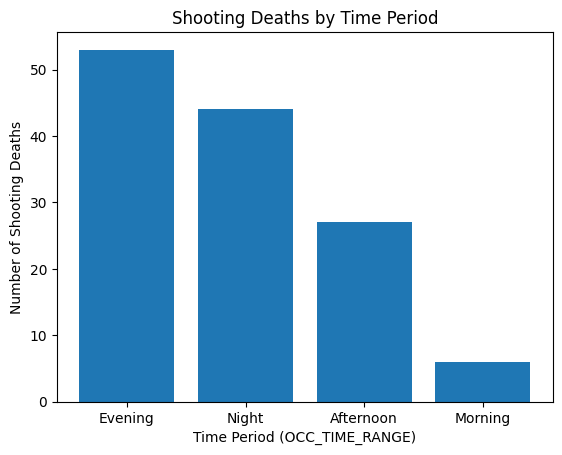

In [161]:
# Data
occ_time_range = ['Evening', 'Night', 'Afternoon', 'Morning']
shooting_deaths = [53, 44, 27, 6]

# Create a histogram
plt.bar(occ_time_range, shooting_deaths)

# Set labels and title
plt.xlabel('Time Period (OCC_TIME_RANGE)')
plt.ylabel('Number of Shooting Deaths')
plt.title('Shooting Deaths by Time Period')

# Show the plot
plt.show()

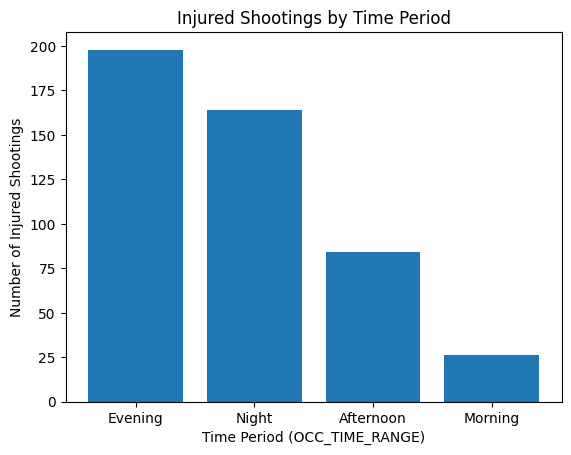

In [162]:
# Data
occ_time_range = ['Evening', 'Night', 'Afternoon', 'Morning']
injured_shootings = [198, 164, 84, 26]

# Create a histogram
plt.bar(occ_time_range, injured_shootings)

# Set labels and title
plt.xlabel('Time Period (OCC_TIME_RANGE)')
plt.ylabel('Number of Injured Shootings')
plt.title('Injured Shootings by Time Period')

# Show the plot
plt.show()

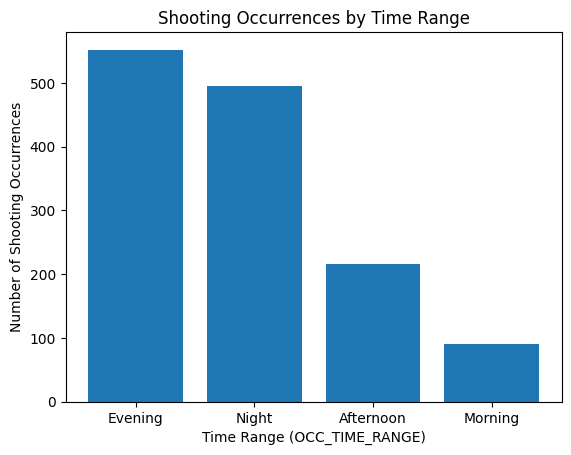

In [163]:
# Data
occ_time_range = ['Evening', 'Night', 'Afternoon', 'Morning']
shooting_occurrences = [552, 495, 215, 90]

# Create a histogram
plt.bar(occ_time_range, shooting_occurrences)

# Set labels and title
plt.xlabel('Time Range (OCC_TIME_RANGE)')
plt.ylabel('Number of Shooting Occurrences')
plt.title('Shooting Occurrences by Time Range')

# Show the plot
plt.show()


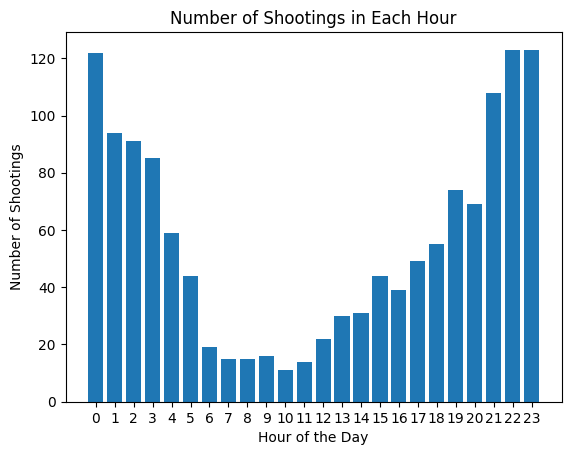

In [164]:
# Data
hours = [23, 22, 0, 21, 1, 2, 3, 19, 20, 4, 18, 17, 5, 15, 16, 14, 13, 12, 6, 9, 7, 8, 11, 10]
shootings_count = [123, 123, 122, 108, 94, 91, 85, 74, 69, 59, 55, 49, 44, 44, 39, 31, 30, 22, 19, 16, 15, 15, 14, 11]

# Create a histogram
plt.bar(hours, shootings_count)

# Set x-ticks to show all hours from 0 to 23
plt.xticks(range(24))

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Shootings')
plt.title('Number of Shootings in Each Hour')

# Show the plot
plt.show()

THE FOLLOWING SECTION HELPS IN DETERMINING THE MOST LIKELY HOUR RANGE(S) OF SHOOTING INCIDENTS IN HIGH RISK NEIGHBOURHOOD FOR ALL YEARS


The code below extracts and organizes data for high-risk neighborhoods, including their day of week, hour of occurrence, time range of occurrence, and risk scores, to aid in further analysis and presentation.

In [165]:
# Filter the "data" DataFrame to include only the neighborhoods present in the "highRisk" DataFrame
filtered_data = data[data['NEIGHBOURHOOD_158'].isin(highRisk['NEIGHBOURHOOD_158'])]

# Merge the filtered data with the "highRisk" DataFrame on 'NEIGHBOURHOOD_158' to include the 'score' column
final_dataframe = pd.merge(filtered_data, highRisk[['NEIGHBOURHOOD_158', 'score']], on='NEIGHBOURHOOD_158', how='inner')

# Select only the relevant columns from the final DataFrame
selected_columns = ['NEIGHBOURHOOD_158', 'OCC_DOW', 'OCC_HOUR', 'OCC_TIME_RANGE', 'score']

# Create the new DataFrame with the selected columns
new_dataframe = final_dataframe[selected_columns]

# Sort the new DataFrame by 'NEIGHBOURHOOD_158' in ascending order
new_dataframe = new_dataframe.sort_values(by='NEIGHBOURHOOD_158')

# Display the new DataFrame
new_dataframe.head(10)

NEIGHBOURHOOD_158    OCC_DOW  OCC_HOUR OCC_TIME_RANGE  score
2902  Agincourt South-Malvern West   Thursday        19        Evening     10
2924  Agincourt South-Malvern West  Wednesday        19        Evening     10
2925  Agincourt South-Malvern West     Sunday         4          Night     10
2926  Agincourt South-Malvern West     Monday        22        Evening     10
2927  Agincourt South-Malvern West    Tuesday        14      Afternoon     10
2928  Agincourt South-Malvern West     Monday        13      Afternoon     10
2929  Agincourt South-Malvern West     Monday        23        Evening     10
2930  Agincourt South-Malvern West     Friday         9        Morning     10
2931  Agincourt South-Malvern West     Sunday        23        Evening     10
2932  Agincourt South-Malvern West     Monday         3          Night     10

The code below performs several operations to create a DataFrame called "most_likely_hour_range_df" containing information about the most likely hour range of incidents for each combination of neighborhood and day of the week. 
The code processes incident data to identify the most likely hour range for each combination of neighborhood and day of the week. It groups the data, calculates the frequency of incidents for each hour range, and determines the hour range with the highest frequency. The results are organized in a DataFrame and sorted by neighborhood and day of the week. The final output provides a clear overview of the most probable time range when incidents are likely to occur in each neighborhood on different days of the week.


In [166]:
# Creating a dataframe with NEIGHBOURHOOD_158, OCC_DOW & " Most Likely Hour Range of Indcident" as the Columns
# Grouping the data based on 'NEIGHBOURHOOD_158' and 'OCC_DOW', and calculate the frequency of each OCC_HOUR
hour_freq_df = new_dataframe.groupby(['NEIGHBOURHOOD_158', 'OCC_DOW', 'OCC_HOUR']).size().reset_index(name='Frequency')

# Defining the hour ranges
hour_ranges = [(0, 5), (6, 11), (12, 17), (18, 23)]

# Creating a function to map hour to hour range
def map_hour_to_range(hour):
    for start, end in hour_ranges:
        if start <= hour <= end:
            return f"{start}-{end}"

# Mapping OCC_HOUR to hour range
hour_freq_df['OCC_HOUR_RANGE'] = hour_freq_df['OCC_HOUR'].apply(map_hour_to_range)

# Grouping the data again based on 'NEIGHBOURHOOD_158' and 'OCC_DOW', and calculate the sum of frequencies for each hour range
hour_range_sum_df = hour_freq_df.groupby(['NEIGHBOURHOOD_158', 'OCC_DOW', 'OCC_HOUR_RANGE'])['Frequency'].sum().reset_index()

# Finding the hour range with the largest sum for each NEIGHBOURHOOD_158 and OCC_DOW combination
hour_range_sum_df['Max_Frequency'] = hour_range_sum_df.groupby(['NEIGHBOURHOOD_158', 'OCC_DOW'])['Frequency'].transform('max')
most_likely_hour_range_df = hour_range_sum_df[hour_range_sum_df['Frequency'] == hour_range_sum_df['Max_Frequency']][['NEIGHBOURHOOD_158', 'OCC_DOW', 'OCC_HOUR_RANGE']]

# Renaming the columns for clarity
most_likely_hour_range_df.columns = ['NEIGHBOURHOOD_158', 'Day of Week', 'Most likely Hour Range of incident']

# Defining the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Converting the 'Day of Week' column to Categorical data type with the specified order
most_likely_hour_range_df['Day of Week'] = pd.Categorical(most_likely_hour_range_df['Day of Week'], categories=day_order, ordered=True)

# Sorting the DataFrame by 'NEIGHBOURHOOD_158' and 'Day of Week'
most_likely_hour_range_df.sort_values(by=['NEIGHBOURHOOD_158', 'Day of Week'], inplace=True)

# Resetting the index of the sorted DataFrame
most_likely_hour_range_df.reset_index(drop=True, inplace=True)

# Displaying the DataFrame
most_likely_hour_range_df.head(20)

NEIGHBOURHOOD_158 Day of Week   
0   Agincourt South-Malvern West      Monday  \
1   Agincourt South-Malvern West     Tuesday   
2   Agincourt South-Malvern West   Wednesday   
3   Agincourt South-Malvern West    Thursday   
4   Agincourt South-Malvern West    Thursday   
5   Agincourt South-Malvern West    Thursday   
6   Agincourt South-Malvern West      Friday   
7   Agincourt South-Malvern West      Friday   
8   Agincourt South-Malvern West    Saturday   
9   Agincourt South-Malvern West      Sunday   
10           Bendale-Glen Andrew      Monday   
11           Bendale-Glen Andrew     Tuesday   
12           Bendale-Glen Andrew     Tuesday   
13           Bendale-Glen Andrew   Wednesday   
14           Bendale-Glen Andrew    Thursday   
15           Bendale-Glen Andrew      Friday   
16           Bendale-Glen Andrew    Saturday   
17           Bendale-Glen Andrew      Sunday   
18                   Black Creek      Monday   
19                   Black Creek     Tuesday   

   Most likely Hour Range of incident  
0                               18-23  
1                               12-17  
2                               18-23  
3                                 0-5  
4                               18-23  
5                                6-11  
6                               18-23  
7                                6-11  
8                                 0-5  
9                                 0-5  
10                                0-5  
11                                0-5  
12                              18-23  
13                              18-23  
14                              18-23  
15                              18-23  
16                              18-23  
17                                0-5  
18                              18-23  
19                              18-23

The code below is used to visualize the most likely hour range of shooting for all hifh risk neighbourhoods for all days of the week

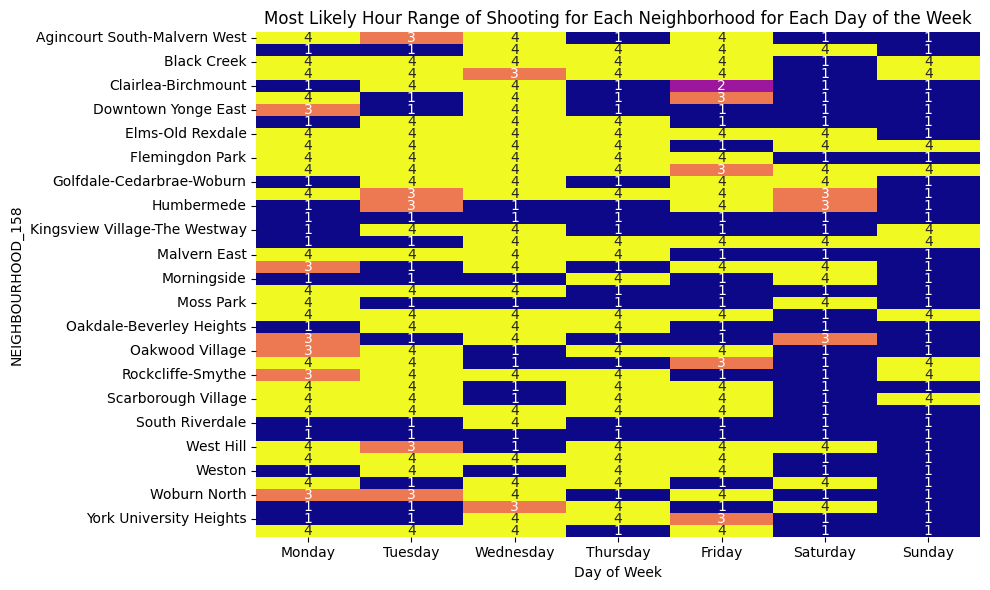

In [167]:
# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'Day of Week' column to Categorical data type with the specified order
most_likely_hour_range_df['Day of Week'] = pd.Categorical(most_likely_hour_range_df['Day of Week'], categories=day_order, ordered=True)

# Sort the DataFrame by 'NEIGHBOURHOOD_158' and 'Day of Week'
most_likely_hour_range_df.sort_values(by=['NEIGHBOURHOOD_158', 'Day of Week'], inplace=True)

# Reset the index of the sorted DataFrame
most_likely_hour_range_df.reset_index(drop=True, inplace=True)

# Aggregate the data by taking the most common "Most likely Hour Range of incident" for each combination of "NEIGHBOURHOOD_158" and "Day of Week"
most_likely_hour_range_df = most_likely_hour_range_df.groupby(['NEIGHBOURHOOD_158', 'Day of Week'])['Most likely Hour Range of incident'].apply(lambda x: x.value_counts().index[0]).reset_index()

# Map the hour ranges to numerical values
hour_range_mapping = {'0-5': 1, '6-11': 2, '12-17': 3, '18-23': 4}
most_likely_hour_range_df['Most likely Hour Range of incident'] = most_likely_hour_range_df['Most likely Hour Range of incident'].map(hour_range_mapping)

# Create a pivot table to transform the data for heatmap
heatmap_data = most_likely_hour_range_df.pivot(index='NEIGHBOURHOOD_158', columns='Day of Week', values='Most likely Hour Range of incident')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='plasma', annot=True, fmt='d', cbar=False)  # Use 'd' format for displaying integers

# Set the labels and title
plt.xlabel('Day of Week')
plt.ylabel('NEIGHBOURHOOD_158')
plt.title('Most Likely Hour Range of Shooting for Each Neighborhood for Each Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()


The code below is for a function, "get_most_likely_hour_range," which is designed to help Victim Services Toronto determine the most probable hour range for shooting incidents in any specific high-risk neighborhood, based on the day of the week. It takes two input parameters: "neighbourhood" and "day_of_week," representing the neighborhood name and the day of the week, respectively.
The result is returned as a DataFrame containing the most probable hour range(s) for shooting incidents in the given neighborhood on the specified day(s) of the week. The function assists Victim Services Toronto in focusing their efforts on critical times and locations, allowing them to better allocate resources and support to those in need.


In [168]:
#CREATING A FUNCTION to Take neighbourhood & day_of_week as Input as give Most Likely Hour of incident as output

def get_most_likely_hour_range(neighbourhood, day_of_week):
    # Define the hour ranges
    hour_ranges = [(0, 5), (6, 11), (12, 17), (18, 23)]

    # Create a function to map hour to hour range
    def map_hour_to_range(hour):
        for start, end in hour_ranges:
            if start <= hour <= end:
                return f"{start}-{end}"

    # Filter the data for the specified neighbourhood and day_of_week
    filtered_data = new_dataframe[(new_dataframe['NEIGHBOURHOOD_158'] == neighbourhood) & (new_dataframe['OCC_DOW'] == day_of_week)]

    # Calculate the frequency of each hour range for the specified neighbourhood and day_of_week
    hour_freq_df = filtered_data.groupby(['NEIGHBOURHOOD_158', 'OCC_DOW', 'OCC_HOUR']).size().reset_index(name='Frequency')
    hour_freq_df['OCC_HOUR_RANGE'] = hour_freq_df['OCC_HOUR'].apply(map_hour_to_range)

    # Group the data again based on 'NEIGHBOURHOOD_158' and 'OCC_DOW', and calculate the sum of frequencies for each hour range
    hour_range_sum_df = hour_freq_df.groupby(['NEIGHBOURHOOD_158', 'OCC_DOW', 'OCC_HOUR_RANGE'])['Frequency'].sum().reset_index()

    # Find the hour range with the largest sum for the specified neighbourhood and day_of_week
    hour_range_sum_df['Max_Frequency'] = hour_range_sum_df.groupby(['NEIGHBOURHOOD_158', 'OCC_DOW'])['Frequency'].transform('max')
    most_likely_hour_range_df = hour_range_sum_df[hour_range_sum_df['Frequency'] == hour_range_sum_df['Max_Frequency']][['NEIGHBOURHOOD_158','OCC_DOW', 'OCC_HOUR_RANGE']]

    # Return the most likely hour range(s) of the incident
    return most_likely_hour_range_df

In [169]:
# Example usage of the function
neighbourhood = 'York University Heights'
day_of_week = 'Thursday'
result_df = get_most_likely_hour_range(neighbourhood, day_of_week)
print(result_df)

         NEIGHBOURHOOD_158   OCC_DOW OCC_HOUR_RANGE
1  York University Heights  Thursday          18-23


## MODELLING ATTEMPT--------------------------------------------------

In [170]:
new_dataframe.head()

NEIGHBOURHOOD_158    OCC_DOW  OCC_HOUR OCC_TIME_RANGE  score
2902  Agincourt South-Malvern West   Thursday        19        Evening     10
2924  Agincourt South-Malvern West  Wednesday        19        Evening     10
2925  Agincourt South-Malvern West     Sunday         4          Night     10
2926  Agincourt South-Malvern West     Monday        22        Evening     10
2927  Agincourt South-Malvern West    Tuesday        14      Afternoon     10

#### Preprocessing
The dataset is preprocessed by mapping the OCC_HOUR values to OCC_HOUR_RANGE using the predefined hour ranges. Categorical variables like NEIGHBOURHOOD_158 and OCC_DOW are encoded numerically using label encoding.

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define the hour ranges
hour_ranges = [(0, 5), (6, 11), (12, 17), (18, 23)]

# Create a function to map hour to hour range
def map_hour_to_range(hour):
    for start, end in hour_ranges:
        if start <= hour <= end:
            return f"{start}-{end}"

# Convert OCC_HOUR to OCC_HOUR_RANGE using the mapping function
new_dataframe['OCC_HOUR_RANGE'] = new_dataframe['OCC_HOUR'].apply(map_hour_to_range)

# Convert categorical variables to numerical using label encoding
label_encoder_neighborhood = LabelEncoder()
label_encoder_dow = LabelEncoder()
label_encoder_hour_range = LabelEncoder()

new_dataframe['NEIGHBOURHOOD_158_encoded'] = label_encoder_neighborhood.fit_transform(new_dataframe['NEIGHBOURHOOD_158'])
new_dataframe['OCC_DOW_encoded'] = label_encoder_dow.fit_transform(new_dataframe['OCC_DOW'])
new_dataframe['OCC_HOUR_RANGE_encoded'] = label_encoder_hour_range.fit_transform(new_dataframe['OCC_HOUR_RANGE'])

# Split the data into training and testing sets
X = new_dataframe[['NEIGHBOURHOOD_158_encoded', 'OCC_DOW_encoded']]
y_hour_range = new_dataframe['OCC_HOUR_RANGE_encoded']

X_train, X_test, y_hour_range_train, y_hour_range_test = train_test_split(X, y_hour_range, test_size=0.2, random_state=42)

#### Decision Tree Classifier
The code below uses a Decision Tree classifier to predict the hour range of shooting incidents based on the encoded neighborhood and day of the week features. 

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train the classification model (Decision Tree) using OCC_HOUR_RANGE_encoded
classification_model = DecisionTreeClassifier()
classification_model.fit(X_train, y_hour_range_train)

# Evaluate the model
y_hour_range_pred = classification_model.predict(X_test)
hour_range_accuracy = accuracy_score(y_hour_range_test, y_hour_range_pred)

print(f"Classification Model Accuracy: {hour_range_accuracy}")

Classification Model Accuracy: 0.44623655913978494


The low accuracy of 44.6% can be attributed to several reasons. One major factor is the limited volume of data, as the dataset contains less than 5000 rows for high-risk neighborhoods. Insufficient data can lead to an incomplete representation of the patterns and relationships in the target variable, making it challenging for the model to generalize accurately. Other reasons may include the complexity of the underlying patterns in the data or the possible imbalance in the target classes.
However, this predictive model holds promise for the future when more volume of recent data becomes available to Victim Services Toronto. With a larger and more diverse dataset, the model's accuracy is likely to improve, enabling better identification of the most likely hour range of shooting incidents in high-risk neighborhoods. As the dataset grows, the model's performance can be continually assessed and refined to provide valuable insights and support to the organization in addressing critical incidents.


In [173]:
# Example usage of the models for prediction
input_neighborhood = 'L\'Amoreaux West'
input_dow = 'Saturday'

# Encode the input variables using label encoding
input_neighborhood_encoded = label_encoder_neighborhood.transform([input_neighborhood])[0]
input_dow_encoded = label_encoder_dow.transform([input_dow])[0]

# Use the trained classification model to predict OCC_HOUR_RANGE_encoded
predicted_hour_range_encoded = classification_model.predict([[input_neighborhood_encoded, input_dow_encoded]])[0]

# Decode the predicted OCC_HOUR_RANGE_encoded back to OCC_HOUR_RANGE
predicted_hour_range = label_encoder_hour_range.inverse_transform([predicted_hour_range_encoded])[0]

print(f"Predicted OCC_HOUR_RANGE: {predicted_hour_range}")

Predicted OCC_HOUR_RANGE: 18-23


In [174]:
new_dataframe.head()

NEIGHBOURHOOD_158    OCC_DOW  OCC_HOUR OCC_TIME_RANGE  score   
2902  Agincourt South-Malvern West   Thursday        19        Evening     10  \
2924  Agincourt South-Malvern West  Wednesday        19        Evening     10   
2925  Agincourt South-Malvern West     Sunday         4          Night     10   
2926  Agincourt South-Malvern West     Monday        22        Evening     10   
2927  Agincourt South-Malvern West    Tuesday        14      Afternoon     10   

     OCC_HOUR_RANGE  NEIGHBOURHOOD_158_encoded  OCC_DOW_encoded   
2902          18-23                          0                4  \
2924          18-23                          0                6   
2925            0-5                          0                3   
2926          18-23                          0                1   
2927          12-17                          0                5   

      OCC_HOUR_RANGE_encoded  
2902                       2  
2924                       2  
2925                       0  
2926                       2  
2927                       1

#### Testing another Preprocessing Approach
The code below executes the decision tree considering all the variables of the new_dataframe as feature variables except
1. The Target Variable
2. The non-encoded categorical variables as they cannot be processed.

In [175]:
# Split the data into training and testing sets
X = new_dataframe.drop(columns=['OCC_HOUR_RANGE_encoded','OCC_HOUR_RANGE','NEIGHBOURHOOD_158','OCC_DOW','OCC_TIME_RANGE'])
y_hour_range = new_dataframe['OCC_HOUR_RANGE_encoded']

X_train2, X_test2, y_hour_range_train2, y_hour_range_test2 = train_test_split(X, y_hour_range, test_size=0.2, random_state=42)

# Train the classification model (Decision Tree) using OCC_HOUR_RANGE_encoded
classification_model = DecisionTreeClassifier()
classification_model.fit(X_train2, y_hour_range_train2)

# Evaluate the model
y_hour_range_pred2 = classification_model.predict(X_test2)
hour_range_accuracy2 = accuracy_score(y_hour_range_test2, y_hour_range_pred2)

print(f"Classification Model Accuracy: {hour_range_accuracy2}")

Classification Model Accuracy: 1.0


The model accuracy of 1.0 (100%) indicates that the model is perfectly predicting the target variable (OCC_HOUR_RANGE_encoded) on the test data. Overfitting happens when a model learns the training data too well, capturing noise and irrelevant patterns specific to the training set. As a result, the model fails to generalize well to unseen data, leading to inflated performance on the test data.

In this case, there are several reasons why the model may have achieved 100% accuracy:

1. Too Many Features: The model is trained on all the available features except the target and non-encoded categorical variables. If there are too many irrelevant or noisy features, the model may memorize the training data, leading to overfitting.

2. Small Dataset: If the dataset is small, the model may be able to memorize the entire training data and perform perfectly on the test data, even though it hasn't learned the underlying patterns.

#### Random Forest Classifier

In [176]:
from sklearn.ensemble import RandomForestClassifier

# Train the classification model (Random Forest) using OCC_HOUR_RANGE_encoded
classification_model = RandomForestClassifier()
classification_model.fit(X_train, y_hour_range_train)

# Evaluate the model
y_hour_range_pred = classification_model.predict(X_test)
hour_range_accuracy = accuracy_score(y_hour_range_test, y_hour_range_pred)

print(f"Classification Model Accuracy: {hour_range_accuracy}")


Classification Model Accuracy: 0.4368279569892473


In [177]:
# Example usage of the models for prediction
input_neighborhood = 'L\'Amoreaux West'
input_dow = 'Saturday'

# Encode the input variables using label encoding
input_neighborhood_encoded = label_encoder_neighborhood.transform([input_neighborhood])[0]
input_dow_encoded = label_encoder_dow.transform([input_dow])[0]

# Use the trained classification model to predict OCC_HOUR_RANGE_encoded
predicted_hour_range_encoded = classification_model.predict([[input_neighborhood_encoded, input_dow_encoded]])[0]

# Decode the predicted OCC_HOUR_RANGE_encoded back to OCC_HOUR_RANGE
predicted_hour_range = label_encoder_hour_range.inverse_transform([predicted_hour_range_encoded])[0]

print(f"Predicted OCC_HOUR_RANGE: {predicted_hour_range}")

Predicted OCC_HOUR_RANGE: 18-23


#### Support Vector Machine

In [178]:
# SUPPORT VECTOR MACHINE
from sklearn.svm import SVC

# Train the classification model (Support Vector Machine) using OCC_HOUR_RANGE_encoded
classification_model = SVC()
classification_model.fit(X_train, y_hour_range_train)

# Evaluate the model
y_hour_range_pred = classification_model.predict(X_test)
hour_range_accuracy = accuracy_score(y_hour_range_test, y_hour_range_pred)

print(f"Classification Model Accuracy: {hour_range_accuracy}")

Classification Model Accuracy: 0.4220430107526882


In [179]:
# Example usage of the models for prediction
input_neighborhood = 'L\'Amoreaux West'
input_dow = 'Saturday'

# Encode the input variables using label encoding
input_neighborhood_encoded = label_encoder_neighborhood.transform([input_neighborhood])[0]
input_dow_encoded = label_encoder_dow.transform([input_dow])[0]

# Use the trained classification model to predict OCC_HOUR_RANGE_encoded
predicted_hour_range_encoded = classification_model.predict([[input_neighborhood_encoded, input_dow_encoded]])[0]

# Decode the predicted OCC_HOUR_RANGE_encoded back to OCC_HOUR_RANGE
predicted_hour_range = label_encoder_hour_range.inverse_transform([predicted_hour_range_encoded])[0]

print(f"Predicted OCC_HOUR_RANGE: {predicted_hour_range}")

Predicted OCC_HOUR_RANGE: 18-23


#### K-Nearest Neighbors Classifier

In [180]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the classification model (K-Nearest Neighbors Classifier)
classification_model = KNeighborsClassifier(n_neighbors=100)
classification_model.fit(X_train, y_hour_range_train)

# Evaluate the model
y_hour_range_pred = classification_model.predict(X_test)
hour_range_accuracy= accuracy_score(y_hour_range_test, y_hour_range_pred)

# Calculate other performance metrics
classification_report_result = classification_report(y_hour_range_test, y_hour_range_pred)

print(f"Classification Model Accuracy: {hour_range_accuracy}")
print("\nClassification Report:\n", classification_report_result)

Classification Model Accuracy: 0.45161290322580644

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.48      0.46       266
           1       0.00      0.00      0.00       114
           2       0.46      0.66      0.54       317
           3       0.00      0.00      0.00        47

    accuracy                           0.45       744
   macro avg       0.22      0.28      0.25       744
weighted avg       0.35      0.45      0.39       744



The output shows that the classification model achieved an accuracy of approximately 45.2%, which means it correctly predicted the hour range for about 45.2% of the incidents in the test set.

The "Classification Report" provides more detailed performance metrics for each class (hour range) in the target variable.

Precision represents the proportion of true positive predictions out of all positive predictions. It is low for classes 1 and 3, indicating that the model struggles to correctly predict these hour ranges.


Recall, also known as sensitivity, represents the proportion of true positive predictions out of all actual positives. Classes 1 and 3 have recall scores of 0, indicating that the model fails to identify any incidents belonging to these hour ranges.


F1-score is the harmonic mean of precision and recall, giving a balance between the two metrics. Again, classes 1 and 3 have F1-scores of 0 due to their low precision and recall values.


Support is the number of samples for each class in the test set.

The macro average and weighted average in the classification report provide overall metrics for the model. The macro average calculates the unweighted mean of precision, recall, and F1-score, while the weighted average considers the support for each class.


The results suggest that the KNN model is struggling to perform well on certain hour ranges, particularly classes 1 and 3. This could be due to imbalanced data or insufficient representation of those classes in the training set. To improve the model's performance, more data for classes 1 and 3 could be collected


In [181]:
# Example usage of the models for prediction
input_neighborhood = 'L\'Amoreaux West'
input_dow = 'Saturday'

# Encode the input variables using label encoding
input_neighborhood_encoded = label_encoder_neighborhood.transform([input_neighborhood])[0]
input_dow_encoded = label_encoder_dow.transform([input_dow])[0]

# Use the trained classification model to predict OCC_HOUR_RANGE_encoded
predicted_hour_range_encoded = classification_model.predict([[input_neighborhood_encoded, input_dow_encoded]])[0]

# Decode the predicted OCC_HOUR_RANGE_encoded back to OCC_HOUR_RANGE
predicted_hour_range = label_encoder_hour_range.inverse_transform([predicted_hour_range_encoded])[0]

print(f"Predicted OCC_HOUR_RANGE: {predicted_hour_range}")

Predicted OCC_HOUR_RANGE: 0-5


---------------------------------------------------------------------------------X------------------------------------------------------------------------------------

Time Analysis for last 5 years only ( repeating the same steps as above)

In [182]:
# Convert OCC_DATE to datetime type for easier filtering
data['OCC_DATE'] = pd.to_datetime(data['OCC_DATE'])

# Filter the "data" DataFrame to include only the last five years (2022-2018)
filtered_data_2 = data[(data['OCC_DATE'].dt.year >= 2018) & (data['OCC_DATE'].dt.year <= 2022)]

# Filter the "data" DataFrame to include only the neighborhoods present in the "highRisk" DataFrame
filtered_data_2= filtered_data_2[filtered_data_2['NEIGHBOURHOOD_158'].isin(highRisk['NEIGHBOURHOOD_158'])]

# Merge the filtered data with the "highRisk" DataFrame on 'NEIGHBOURHOOD_158' to include the 'score' column
final_dataframe_2 = pd.merge(filtered_data_2, highRisk[['NEIGHBOURHOOD_158', 'score']], on='NEIGHBOURHOOD_158', how='inner')

# Select only the relevant columns from the final DataFrame
selected_columns_2 = ['NEIGHBOURHOOD_158', 'OCC_DOW', 'OCC_HOUR', 'OCC_TIME_RANGE', 'score']

# Create the new DataFrame with the selected columns
new_dataframe_2 = final_dataframe_2[selected_columns_2]

# Sort the new DataFrame by 'NEIGHBOURHOOD_158' in ascending order
new_dataframe_2 = new_dataframe_2.sort_values(by='NEIGHBOURHOOD_158')

# Display the new DataFrame
new_dataframe_2.head(20)

NEIGHBOURHOOD_158    OCC_DOW  OCC_HOUR OCC_TIME_RANGE  score
1243  Agincourt South-Malvern West  Wednesday        18        Evening     10
1229  Agincourt South-Malvern West  Wednesday        19        Evening     10
1230  Agincourt South-Malvern West     Sunday         4          Night     10
1231  Agincourt South-Malvern West     Monday        22        Evening     10
1232  Agincourt South-Malvern West    Tuesday        14      Afternoon     10
1233  Agincourt South-Malvern West     Monday        13      Afternoon     10
1234  Agincourt South-Malvern West     Monday        23        Evening     10
1235  Agincourt South-Malvern West     Friday         9        Morning     10
1236  Agincourt South-Malvern West     Sunday        23        Evening     10
1237  Agincourt South-Malvern West     Monday         3          Night     10
1238  Agincourt South-Malvern West   Thursday         1          Night     10
1239  Agincourt South-Malvern West  Wednesday        15      Afternoon     10
1240  Agincourt South-Malvern West   Saturday        20        Evening     10
1241  Agincourt South-Malvern West   Thursday         9        Morning     10
1242  Agincourt South-Malvern West     Sunday        20        Evening     10
1228  Agincourt South-Malvern West    Tuesday        21        Evening     10
1227  Agincourt South-Malvern West     Monday         0          Night     10
1281           Bendale-Glen Andrew     Sunday        21        Evening     11
1293           Bendale-Glen Andrew    Tuesday         3          Night     11
1294           Bendale-Glen Andrew     Sunday         0          Night     11

In [183]:
# Attempting to create a dataframe with NEIGHBOURHOOD_158, OCC_DOW & " Most Likely Hour Range of Indcident" as the Columns

# Group the data based on 'NEIGHBOURHOOD_158' and 'OCC_DOW', and calculate the frequency of each OCC_HOUR
hour_freq_df_2 = new_dataframe_2.groupby(['NEIGHBOURHOOD_158', 'OCC_DOW', 'OCC_HOUR']).size().reset_index(name='Frequency')

# Define the hour ranges
hour_ranges_2 = [(0, 5), (6, 11), (12, 17), (18, 23)]

# Create a function to map hour to hour range
def map_hour_to_range(hour):
    for start, end in hour_ranges:
        if start <= hour <= end:
            return f"{start}-{end}"

# Map OCC_HOUR to hour range
hour_freq_df_2['OCC_HOUR_RANGE'] = hour_freq_df_2['OCC_HOUR'].apply(map_hour_to_range)

# Group the data again based on 'NEIGHBOURHOOD_158' and 'OCC_DOW', and calculate the sum of frequencies for each hour range
hour_range_sum_df_2 = hour_freq_df_2.groupby(['NEIGHBOURHOOD_158', 'OCC_DOW', 'OCC_HOUR_RANGE'])['Frequency'].sum().reset_index()

# Find the hour range with the largest sum for each NEIGHBOURHOOD_158 and OCC_DOW combination
hour_range_sum_df_2['Max_Frequency'] = hour_range_sum_df_2.groupby(['NEIGHBOURHOOD_158', 'OCC_DOW'])['Frequency'].transform('max')
most_likely_hour_range_df_2= hour_range_sum_df_2[hour_range_sum_df_2['Frequency'] == hour_range_sum_df_2['Max_Frequency']][['NEIGHBOURHOOD_158', 'OCC_DOW', 'OCC_HOUR_RANGE']]

# Rename the columns for clarity
most_likely_hour_range_df_2.columns= ['NEIGHBOURHOOD_158', 'Day of Week', 'Most likely Hour Range of incident']

# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'Day of Week' column to Categorical data type with the specified order
most_likely_hour_range_df_2['Day of Week'] = pd.Categorical(most_likely_hour_range_df_2['Day of Week'], categories=day_order, ordered=True)

# Sort the DataFrame by 'NEIGHBOURHOOD_158' and 'Day of Week'
most_likely_hour_range_df_2.sort_values(by=['NEIGHBOURHOOD_158', 'Day of Week'], inplace=True)

# Reset the index of the sorted DataFrame
most_likely_hour_range_df_2.reset_index(drop=True, inplace=True)
# Display the DataFrame
most_likely_hour_range_df_2.head(20)


NEIGHBOURHOOD_158 Day of Week   
0   Agincourt South-Malvern West      Monday  \
1   Agincourt South-Malvern West      Monday   
2   Agincourt South-Malvern West     Tuesday   
3   Agincourt South-Malvern West     Tuesday   
4   Agincourt South-Malvern West   Wednesday   
5   Agincourt South-Malvern West    Thursday   
6   Agincourt South-Malvern West    Thursday   
7   Agincourt South-Malvern West      Friday   
8   Agincourt South-Malvern West    Saturday   
9   Agincourt South-Malvern West      Sunday   
10           Bendale-Glen Andrew      Monday   
11           Bendale-Glen Andrew     Tuesday   
12           Bendale-Glen Andrew   Wednesday   
13           Bendale-Glen Andrew   Wednesday   
14           Bendale-Glen Andrew   Wednesday   
15           Bendale-Glen Andrew    Thursday   
16           Bendale-Glen Andrew    Thursday   
17           Bendale-Glen Andrew      Friday   
18           Bendale-Glen Andrew    Saturday   
19           Bendale-Glen Andrew      Sunday   

   Most likely Hour Range of incident  
0                                 0-5  
1                               18-23  
2                               12-17  
3                               18-23  
4                               18-23  
5                                 0-5  
6                                6-11  
7                                6-11  
8                               18-23  
9                               18-23  
10                              12-17  
11                                0-5  
12                                0-5  
13                              12-17  
14                              18-23  
15                              18-23  
16                               6-11  
17                                0-5  
18                                0-5  
19                                0-5

In [184]:
#CREATING A FUNCTION to Take neighbourhood & day_of_week as Input as give Most Likely Hour of incident as output

def get_most_likely_hour_range_2(neighbourhood, day_of_week):
    # Define the hour ranges
    hour_ranges_2 = [(0, 5), (6, 11), (12, 17), (18, 23)]

    # Create a function to map hour to hour range
    def map_hour_to_range(hour):
        for start, end in hour_ranges_2:
            if start <= hour <= end:
                return f"{start}-{end}"

    # Filter the data for the specified neighbourhood and day_of_week
    filtered_data_2 = new_dataframe_2[(new_dataframe_2['NEIGHBOURHOOD_158'] == neighbourhood) & (new_dataframe_2['OCC_DOW'] == day_of_week)]

    # Calculate the frequency of each hour range for the specified neighbourhood and day_of_week
    hour_freq_df_2 = filtered_data_2.groupby(['NEIGHBOURHOOD_158', 'OCC_DOW', 'OCC_HOUR']).size().reset_index(name='Frequency')
    hour_freq_df_2['OCC_HOUR_RANGE'] = hour_freq_df_2['OCC_HOUR'].apply(map_hour_to_range)

    # Group the data again based on 'NEIGHBOURHOOD_158' and 'OCC_DOW', and calculate the sum of frequencies for each hour range
    hour_range_sum_df_2 = hour_freq_df_2.groupby(['NEIGHBOURHOOD_158', 'OCC_DOW', 'OCC_HOUR_RANGE'])['Frequency'].sum().reset_index()

   # Find the hour range with the largest sum for the specified neighbourhood and day_of_week
    hour_range_sum_df_2['Max_Frequency'] = hour_range_sum_df_2.groupby(['NEIGHBOURHOOD_158', 'OCC_DOW'])['Frequency'].transform('max')
    most_likely_hour_range_df_2 = hour_range_sum_df_2[hour_range_sum_df_2['Frequency'] == hour_range_sum_df_2['Max_Frequency']][['NEIGHBOURHOOD_158', 'OCC_DOW', 'OCC_HOUR_RANGE']]

    # Return the most likely hour range(s) of the incident
    return most_likely_hour_range_df_2


In [185]:
# Example usage of the function
neighbourhood = 'Agincourt South-Malvern West'
day_of_week = 'Thursday'
result_df_2= get_most_likely_hour_range_2(neighbourhood, day_of_week)
print(result_df_2)

              NEIGHBOURHOOD_158   OCC_DOW OCC_HOUR_RANGE
0  Agincourt South-Malvern West  Thursday            0-5
1  Agincourt South-Malvern West  Thursday           6-11


#### MODELLING ATTEMPT

In [186]:
#USING DECISION TREES

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the hour ranges
hour_ranges = [(0, 5), (6, 11), (12, 17), (18, 23)]

# Create a function to map hour to hour range
def map_hour_to_range(hour):
    for start, end in hour_ranges:
        if start <= hour <= end:
            return f"{start}-{end}"

# Convert OCC_HOUR to OCC_HOUR_RANGE using the mapping function
new_dataframe_2['OCC_HOUR_RANGE'] = new_dataframe_2['OCC_HOUR'].apply(map_hour_to_range)

# Convert categorical variables to numerical using label encoding
label_encoder_neighborhood = LabelEncoder()
label_encoder_dow = LabelEncoder()
label_encoder_hour_range = LabelEncoder()

new_dataframe_2['NEIGHBOURHOOD_158_encoded'] = label_encoder_neighborhood.fit_transform(new_dataframe_2['NEIGHBOURHOOD_158'])
new_dataframe_2['OCC_DOW_encoded'] = label_encoder_dow.fit_transform(new_dataframe_2['OCC_DOW'])
new_dataframe_2['OCC_HOUR_RANGE_encoded'] = label_encoder_hour_range.fit_transform(new_dataframe_2['OCC_HOUR_RANGE'])

# Split the data into training and testing sets
X = new_dataframe_2[['NEIGHBOURHOOD_158_encoded', 'OCC_DOW_encoded']]
y_hour_range = new_dataframe_2['OCC_HOUR_RANGE_encoded']

X_train, X_test, y_hour_range_train, y_hour_range_test = train_test_split(X, y_hour_range, test_size=0.2, random_state=42)

# Train the classification model (Decision Tree) using OCC_HOUR_RANGE_encoded
classification_model = DecisionTreeClassifier()
classification_model.fit(X_train, y_hour_range_train)

# Evaluate the model
y_hour_range_pred = classification_model.predict(X_test)
hour_range_accuracy = accuracy_score(y_hour_range_test, y_hour_range_pred)

print(f"Classification Model Accuracy: {hour_range_accuracy}")


Classification Model Accuracy: 0.36900369003690037


In [187]:
# Example usage of the models for prediction
input_neighborhood = 'L\'Amoreaux West'
input_dow = 'Saturday'

# Encode the input variables using label encoding
input_neighborhood_encoded = label_encoder_neighborhood.transform([input_neighborhood])[0]
input_dow_encoded = label_encoder_dow.transform([input_dow])[0]

# Use the trained classification model to predict OCC_HOUR_RANGE_encoded
predicted_hour_range_encoded = classification_model.predict([[input_neighborhood_encoded, input_dow_encoded]])[0]

# Decode the predicted OCC_HOUR_RANGE_encoded back to OCC_HOUR_RANGE
predicted_hour_range = label_encoder_hour_range.inverse_transform([predicted_hour_range_encoded])[0]

print(f"Predicted OCC_HOUR_RANGE: {predicted_hour_range}")

Predicted OCC_HOUR_RANGE: 12-17


# Conclusion & Recommendation:



- According to our comprehensive Scoring system, we have identified 42 areas with a high likelihood of gun crime occurrence. Our analysis further reveals that the majority of gunshot crimes are concentrated during evening and night hours. With this valuable information, Victim Services Toronto can make informed decisions to strategically allocate their resources. This could involve establishing a new branch in a high-risk neighborhood, providing additional therapists to provide support to crime victims, or devising targeted safety plans tailored to the crime patterns during specific time periods within the community. By leveraging the insights from our scoring system, Victim Services Toronto can enhance their effectiveness in mitigating gun violence and fostering safer environments for the communities they serve. 

- Our tool - "get_most_likely_hour_range" function will play a crucial role in helping Victim Services Toronto fulfill its mission of ensuring the safety and well-being of the community. By leveraging this function, the organization can enhance its support and intervention strategies, contributing to a safer and more secure environment for all.

- Currently, Decision Tree and K-Nearest Neighbors (KNN) models demonstrate an accuracy of 44.6% and 45.2%, respectively, which is largely attributed to the limited data volume available for training. To address this, we suggest collaborating with the Toronto Police to access more recent gunshot crime data. By feeding this additional data into the models, it is likely to significantly improve the accuracy of gunshot crime prediction. This enhancement will enable Victim Services to make more precise plans to effectively mitigate gunshot crime in the community.
